# Исследование развлекательного приложения Procrastinate Pro+

**Описание проекта:**

Развлекательное приложение Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Нужно разобраться в причинах и помочь компании выйти в плюс.
______

**Цель исследования:**

Изучить и выявить:
- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.
______

**Данные для анализа:**

В нашем распоряжении три датасета: файл *visits_info_short.csv* хранит лог сервера с информацией о посещениях сайта, *orders_info_short.csv* — информацию о заказах, а *costs_info_short.csv* — информацию о расходах на рекламу.

1. Структура файла *visits_info_short.csv*:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

2. Структура файла *orders_info_short.csv*:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

3. Структура файла *costs_info_short.csv*:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.


Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.
______

**План работы:**

1. Загрузка и предобработка данных:
    - загрузка и первичное знакомство с данными;
    - проверка данных на наличие пропусков и дубликатов;
    - проверка, что данные соответствуют ожидаемым типам и преобразование типов данных, если требуется.
    
    
2. Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии:
    - get_profiles() — для создания профилей пользователей,
    - get_retention() — для подсчёта Retention Rate,
    - get_conversion() — для подсчёта конверсии,
    - get_ltv() — для подсчёта LTV.
    
   Функции для построения графиков:
    - filter_data() — для сглаживания данных,
    - plot_retention() — для построения графика Retention Rate,
    - plot_conversion() — для построения графика конверсии,
    - plot_ltv_roi — для визуализации LTV и ROI.


3. Исследование профилей пользователей:
    - анализ стран: количество пользователей и доля платящих;
    - анализ устройств: количество пользователей и доля платящих;
    - анализ рекламных кампаний: количество пользователей и доля платящих.
  
  
4. Анализ рекламных затрат и их распределения:
    - распределение трат по рекламным источникам;
    - визуализация динамики расходов во времени (по неделям и месяцам);
    - расчет CAC (Customer Acquisition Cost).
    
    
5. Оценка окупаемости рекламы по сегментам:
    - построение графиков и анализ LTV, ROI и CAC:
        - по странам;
        - по устройствам;
        - по рекламным каналам.       
    - построение графиков и анализ конверсии и удержания пользователей;
    

6. Итоговые выводы и рекомендации для отдела маркетинга:
    - причины неэффективности привлечения пользователей;
    - рекомендации для отдела маркетинга.

### Загружаем данные и готовим их к анализу

**1.1. Импортируем все библиотеки, необходимые для анализа.**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

**1.2. Считываем данные из csv-файлов и сохраняем в датафреймы visits, orders, costs.**

In [7]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

**1.3. Посмотрим на данные.**

In [9]:
print("Первые и последние строки датафрейма visits:")
display(visits)
print("\nПервые и последние строки датафрейма orders:")
display(orders)
print("\nПервые и последние строки датафрейма costs:")
display(costs)

Первые и последние строки датафрейма visits:


User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]


Первые и последние строки датафрейма orders:


User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]


Первые и последние строки датафрейма costs:


dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

**1.4. Выводим информацию о данных.**

In [11]:
print("Информация о датафрейме visits:")
visits.info()
print("\nИнформация о датафрейме orders:")
orders.info()
print("\nИнформация о датафрейме costs:")
costs.info()

Информация о датафрейме visits:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Информация о датафрейме orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Информация о датафрейме costs:
<class 'pandas.core.fra

**1.5. Приведем названия столбцов к нижнему регистру и заменим пробелы на нижнее подчеркивание.**

In [13]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

# Проверим изменения
print(visits.columns, '\n')
print(orders.columns, '\n')
print(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object') 

Index(['user_id', 'event_dt', 'revenue'], dtype='object') 

Index(['dt', 'channel', 'costs'], dtype='object')


**1.6. Преобразуем столбцы с датой и временем в формат datetime.**

In [15]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# Проверим изменения
print(visits.dtypes, '\n')
print(orders.dtypes, '\n')
print(costs.dtypes)

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object 

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object 

dt          object
channel     object
costs      float64
dtype: object


**1.7. Проверим на наличие пропусков.**

In [17]:
print("Пропуски в visits:", visits.isna().sum())
print("\nПропуски в orders:", orders.isna().sum())
print("\nПропуски в costs:", costs.isna().sum())

Пропуски в visits: user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Пропуски в orders: user_id     0
event_dt    0
revenue     0
dtype: int64

Пропуски в costs: dt         0
channel    0
costs      0
dtype: int64


**1.8. Проверим на наличие дубликатов.**

In [19]:
print("Дубликаты в visits:", visits.duplicated().sum())
print("Дубликаты в orders:", orders.duplicated().sum())
print("Дубликаты в costs:", costs.duplicated().sum())

Дубликаты в visits: 0
Дубликаты в orders: 0
Дубликаты в costs: 0


Выводы:
1. Структура данных:
- visits (309901 строк × 6 столбцов): содержит информацию о визитах пользователей, включая регион, устройство, канал привлечения и временные отметки начала и окончания сессий.
- orders (40212 строк × 3 столбца): данные о заказах пользователей, включающие идентификатор пользователя, время заказа и сумму дохода.
- costs (1800 строк × 3 столбца): данные о затратах по каналам рекламы за каждый день.

2. Преобразование данных:
- названия столбцов приведены к нижнему регистру, пробелы заменены на подчеркивания.
- столбцы с датой и временем преобразованы в формат datetime, что позволит проводить временные вычисления. Остальные данные соответствуют ожидаемым типам.

3. Пропуски и дубликаты:
- пропуски в данных отсутствуют.
- дубликатов также нет.

### Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [22]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(14, 6))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(1, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')


    # второй график — динамика удержания платящих
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    
    plt.tight_layout()
    plt.show()

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(14, 6))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

**3.1. Получаем профили пользователей.**

In [32]:
# Получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles) 

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month  payer  acquisition_cost  
0       2019-05-07 2019-05-01   True          1.088172  
1       2019-07-09 2019-07-01  False          1.107237  
2       2019-10-01 2019-10-01  False          0.000000  
3       2019-08-22 2019-08-01  False          0.988235  
4       2019-10-02 2019-10-01  False          0.230769  
...            ...        ...    ...               ...  
150003  2019-09-28 2019-09-01  False          3.500000  
150004  2019-10-21 2019-10-01  False          0.000000  
150005  2019-07-23 2019-07-01  False          2.600000  
150006  2019-09-28 2019-09-01  False          0.205714  
150007  2019-10-18 2019-10-01  False          0.000000  

[150008 rows x 9 columns]

In [33]:
# Определяем минимальную и максимальную даты привлечения пользователей

min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()

# Выводим на экран минимальную и максимальную даты
print(f'Минимальная дата привлечения пользователей: {min_date}')
print(f'Максимальная дата привлечения пользователей: {max_date}')

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


Пользователи были привлечённы с 1 мая по 27 октября 2019 года. Даты совпадают с ТЗ.

**3.2. Анализируем страны: количество пользователей и доля платящих.**

In [36]:
# Анализируем страны: количество пользователей и доля платящих

countries = (
    profiles.groupby('region')
    .agg(
        {
            'user_id': 'nunique',
            'payer': 'sum'
        }
    )
    .rename(columns={'user_id': 'total_users', 'payer': 'paying_users'})
    .reset_index()
)

total_users = countries['total_users'].sum()
paying_users = countries['paying_users'].sum()

countries['total_share'] = countries['total_users'] / total_users
countries['paying_share'] = countries['paying_users'] / countries['total_users']

In [37]:
# Строим таблицу, отражающую количество пользователей и долю платящих из каждой страны

top_paying_countries = countries.sort_values(by='paying_share', ascending=False)

display(top_paying_countries)

print('Общее количество пользователей: ', total_users)
print('Общее количество платящих пользователей: ', paying_users)
print(f'Доля платящих пользователей: {paying_users/total_users*100:.2f}%')

region  total_users  paying_users  total_share  paying_share
3  United States       100002          6902     0.666644      0.069019
1        Germany        14981           616     0.099868      0.041119
2             UK        17575           700     0.117160      0.039829
0         France        17450           663     0.116327      0.037994

Общее количество пользователей:  150008
Общее количество платящих пользователей:  8881
Доля платящих пользователей: 5.92%


Выводы:
1. Общее количество пользователей (150008):
    - США имеет наибольшее количество пользователей — 100002, что составляет около 66.66% от всех пользователей.
    - другие страны существенно отстают: Великобритания — 11.72%, и Франция — 11.63% и Германия — 9.99%.


2. Доля платящих пользователей (8881 из 150008 - 5.92%):
    - наибольшая доля платящих пользователей в США — 6.9%.
    - Германия — вторая по доле платящих (4.11%), затем идут Великобритания (3.98%) и Франция (3.8%).

**3.3. Анализируем устройства: количество пользователей и доля платящих.**

In [40]:
# Анализируем устройства: количество пользователей и доля платящих

devices = (
    profiles.groupby('device')
    .agg(
        {
            'user_id': 'nunique',
            'payer': 'sum'
        }
    )
    .rename(columns={'user_id': 'total_users', 'payer': 'paying_users'})
    .reset_index()
)

total_users = devices['total_users'].sum()
paying_users = devices['paying_users'].sum()

devices['total_share'] = devices['total_users'] / total_users
devices['paying_share'] = devices['paying_users'] / devices['total_users']

In [111]:
# Строим таблицу, отражающую количество пользователей и долю платящих для каждого устройства

top_paying_devices = devices.sort_values(by='paying_share', ascending=False)

display(top_paying_devices)

print('Общее количество пользователей: ', total_users)
print('Общее количество платящих пользователей: ', paying_users)
print(f'Доля платящих пользователей: {paying_users/total_users*100:.2f}%')

device  total_users  paying_users  total_share  paying_share
1      Mac        30042          1912     0.200269      0.063644
3   iPhone        54479          3382     0.363174      0.062079
0  Android        35032          2050     0.233534      0.058518
2       PC        30455          1537     0.203023      0.050468

Общее количество пользователей:  150008
Общее количество платящих пользователей:  8881
Доля платящих пользователей: 5.92%


Выводы:
1. Распределение пользователей по устройствам:
    - iPhone — наибольшая доля пользователей: 54479 (36.32% от общего числа).
    - Android — второе по количеству устройство: 35032 пользователей (23.35%).
    - Mac и PC занимают приблизительно одинаковые доли: 30042 пользователей (20.03%) для Mac и 30455 (20.30%) для PC.


2. Доля платящих пользователей (paying_share):
    - наибольшая доля платящих у пользователей Mac и iPhone — 6.36% и 6.21%.
    - пользователи Android имеют 5.85% долю платящих пользователей.
    - пользователи PC — 5.05%.

**3.4. Анализируем каналы привлечения: количество пользователей и доля платящих.**

In [44]:
# Анализируем каналы: количество пользователей и доля платящих

channels = (
    profiles.groupby('channel')
    .agg(
        {
            'user_id': 'nunique',
            'payer': 'sum'
        }
    )
    .rename(columns={'user_id': 'total_users', 'payer': 'paying_users'})
    .reset_index()
)

total_users = channels['total_users'].sum()
paying_users = channels['paying_users'].sum()

channels['total_share'] = channels['total_users'] / total_users
channels['paying_share'] = channels['paying_users'] / channels['total_users']

In [45]:
# Строим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения

top_paying_channels = channels.sort_values(by='paying_share', ascending=False)

display(top_paying_channels)

print('Общее количество пользователей: ', total_users)
print('Общее количество платящих пользователей: ', paying_users)
print(f'Доля платящих пользователей: {paying_users/total_users*100:.2f}%')

channel  total_users  paying_users  total_share  paying_share
1             FaceBoom        29144          3557     0.194283      0.122049
0           AdNonSense         3880           440     0.025865      0.113402
9       lambdaMediaAds         2149           225     0.014326      0.104700
6               TipTop        19561          1878     0.130400      0.096007
5       RocketSuperAds         4448           352     0.029652      0.079137
7       WahooNetBanner         8553           453     0.057017      0.052964
8              YRabbit         4312           165     0.028745      0.038265
3         MediaTornado         4364           156     0.029092      0.035747
2              LeapBob         8553           262     0.057017      0.030633
4   OppleCreativeMedia         8605           233     0.057364      0.027077
10             organic        56439          1160     0.376240      0.020553

Общее количество пользователей:  150008
Общее количество платящих пользователей:  8881
Доля платящих пользователей: 5.92%


Выводы:
1. Каналы с наибольшим количеством пользователей:
    - organic привлекает наибольшее количество пользователей — 56439 (37.62% от общего числа), но имеет одну из самых низких долей платящих пользователей — 2.06%.
    - FaceBoom занимает второе место по числу пользователей — 29144 (19.43%) и имеет самую высокую долю платящих — 12.20%.
    - TipTop и WahooNetBanner также имеют значительное количество пользователей — 19561 (13.04%) и 8,553 (5.70%) соответственно.


2. Каналы с наибольшей долей платящих пользователей (paying_share):
    - FaceBoom лидирует с самой высокой долей платящих пользователей — 12.20%.
    - AdNonSense и lambdaMediaAds также показывают хорошие показатели: 11.34% и 10.47% соответственно.
    - TipTop имеет относительно высокую долю платящих — 9.60%, несмотря на меньшее количество пользователей по сравнению с FaceBoom.


3. Каналы с наименьшей долей платящих:
    - OppleCreativeMedia, LeapBob, и MediaTornado имеют низкую долю платящих пользователей — менее 3.6%.

### Маркетинг

**4.1. Посчитаем общую сумму расходов на маркетинг.**

In [49]:
total_costs = costs['costs'].sum()
total_costs

105497.30000000002

Выводы: общая сумма расходов на маркетинг составляет 105497.30.

**4.2. Выясним, как траты распределены по рекламным источникам.**

In [52]:
costs_per_channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).reset_index()


total_costs = costs_per_channel['costs'].sum()
costs_per_channel['share'] = costs_per_channel['costs'] / total_costs

costs_per_channel

channel     costs     share
0              TipTop  54751.30  0.518983
1            FaceBoom  32445.60  0.307549
2      WahooNetBanner   5151.00  0.048826
3          AdNonSense   3911.25  0.037074
4  OppleCreativeMedia   2151.25  0.020392
5      RocketSuperAds   1833.00  0.017375
6             LeapBob   1797.60  0.017039
7      lambdaMediaAds   1557.60  0.014764
8        MediaTornado    954.48  0.009047
9             YRabbit    944.22  0.008950

Выводы:
1. Основные каналы по затратам:
    - TipTop: 54751.30 (51.90% от общего объема расходов).
    - FaceBoom: 32445.60 (30.75%).
    - эти два канала занимают значительную часть бюджета, вместе составляя 82.66% от всех расходов.


2. Каналы со средними расходами:
    - WahooNetBanner: 5151.00 (4.88%)
    - AdNonSense: 3911.25 (3.71%)
    - эти каналы занимают среднюю долю в расходах, с общей долей в 8.59%.


3. Каналы с наименьшими расходами:
    - OppleCreativeMedia: 2151.25 (2.04%)
    - RocketSuperAds: 1833.00 (1.74%)
    - LeapBob: 1797.60 (1.70%)
    - lambdaMediaAds: 1557.60 (1.48%)
    - MediaTornado: 954.48 (0.90%)
    - YRabbit: 944.22 (0.90%)
    - эти каналы имеют незначительные расходы по сравнению с основными каналами и занимают вместе 8.56% от общего бюджета.

**4.3. Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику.  Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.**

In [55]:
# Строим таблицу, отражающую динамику расходов по неделям
# costs['week'] = pd.to_datetime(costs['dt']).apply(lambda r: r.strftime('%Y-%U'))
costs['year'] = pd.to_datetime(costs['dt']).dt.year
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
weekly_costs = costs.groupby(['year', 'week', 'channel']).agg({'costs': 'sum'}).unstack().fillna(0)
weekly_costs

costs                                                   \
channel   AdNonSense FaceBoom LeapBob MediaTornado OppleCreativeMedia   
year week                                                               
2019 18       211.05    535.7   16.80        38.64              24.00   
     19       273.00    750.2   31.71        61.68              34.50   
     20       265.65    755.7   26.67        59.04              27.50   
     21       266.70    722.7   26.67        50.16              34.25   
     22       202.65   1208.9   65.52        36.96              81.75   
     23       102.90   1081.3   66.99        27.60              79.50   
     24        96.60   1042.8   52.29        29.76              71.50   
     25       141.75   1280.4   68.46        32.16              79.75   
     26       148.05   1647.8   99.75        40.56             107.00   
     27       130.20   1536.7   87.36        43.44             102.50   
     28       106.05   1124.2   62.58        28.80              81.00   
     29        97.65    975.7   61.11        26.40              68.00   
     30       118.65   1130.8   67.20        25.20              80.75   
     31       141.75   1419.0   83.58        35.04              90.75   
     32       116.55   1290.3   87.57        29.04             104.00   
     33       117.60   1456.4   77.49        40.80              98.50   
     34       142.80   1411.3   90.51        35.28             103.75   
     35       133.35   1445.4   77.91        33.84              92.75   
     36       100.80   1151.7   66.99        30.24              72.75   
     37       100.80   1148.4   63.84        25.92              78.00   
     38       139.65   1496.0   81.27        30.24             105.75   
     39       192.15   1837.0  101.22        48.24             132.25   
     40       155.40   1761.1  101.01        42.00             123.00   
     41       136.50   1392.6   78.96        36.96              88.25   
     42       118.65   1291.4   69.72        29.04              88.00   
     43       154.35   1552.1   84.42        37.44             101.50   

                                                                        
channel   RocketSuperAds  TipTop WahooNetBanner YRabbit lambdaMediaAds  
year week                                                               
2019 18           99.450   347.0           49.2   52.20           81.6  
     19          139.230   470.0           92.4   75.90          103.2  
     20          138.060   454.0           90.0   69.30           90.4  
     21          131.040   801.8           79.2   65.40          119.2  
     22           97.695  1421.2          179.4   49.80           83.2  
     23           76.050  1223.6          196.8   25.80           35.2  
     24           63.180  1121.0          166.2   17.46           45.6  
     25           80.730  1474.4          201.6   22.14           40.0  
     26           78.260  2343.6          285.0   27.90           59.2  
     27           75.075  2340.0          256.8   28.26           60.0  
     28           55.965  1820.0          174.0   19.44           44.8  
     29           41.860  1552.2          159.6   15.66           41.6  
     30           54.600  1713.4          182.4   22.86           49.6  
     31           61.880  2493.6          204.6   27.33           52.0  
     32           69.615  2448.0          231.6   28.56           41.6  
     33           62.010  2538.0          238.2   28.56           46.4  
     34           40.300  2514.0          244.8   30.03           57.6  
     35           51.350  2583.0          235.8   24.36           54.4  
     36           40.625  2563.0          174.6   27.93           52.0  
     37           40.950  2506.0          192.6   29.76           41.6  
     38           56.225  3241.0          226.2   39.60           57.6  
     39           63.700  3979.5          303.0   47.52           80.0  
     40           66.300  3703.0          309.0   45.36           59.2  

In [56]:
# Строим таблицу, отражающую динамику расходов по месяцам
# costs['month'] = pd.to_datetime(costs['dt']).apply(lambda r: r.strftime('%Y-%m'))
costs['month'] = pd.to_datetime(costs['dt']).dt.month
monthly_costs = costs.groupby(['year', 'month', 'channel']).agg({'costs': 'sum'}).unstack().fillna(0)
monthly_costs

costs                                                   \
channel    AdNonSense FaceBoom LeapBob MediaTornado OppleCreativeMedia   
year month                                                               
2019 5        1169.70   3524.4  140.28       238.56             169.75   
     6         538.65   5501.1  314.58       138.00             370.00   
     7         504.00   5294.3  313.53       138.48             366.50   
     8         579.60   6274.4  369.81       154.56             439.25   
     9         581.70   6114.9  343.98       144.72             427.75   
     10        537.60   5736.5  315.42       140.16             378.00   

                                                                          
channel    RocketSuperAds   TipTop WahooNetBanner YRabbit lambdaMediaAds  
year month                                                                
2019 5            577.980   2981.0          418.8  299.70          458.4  
     6            325.715   6675.6          921.0  106.20          199.2  
     7            252.070   8410.2          851.4   97.38          219.2  
     8            253.110  11202.0         1040.4  124.74          220.0  
     9            218.400  13232.5          977.4  152.79          247.2  
     10           205.725  12250.0          942.0  163.41          213.6

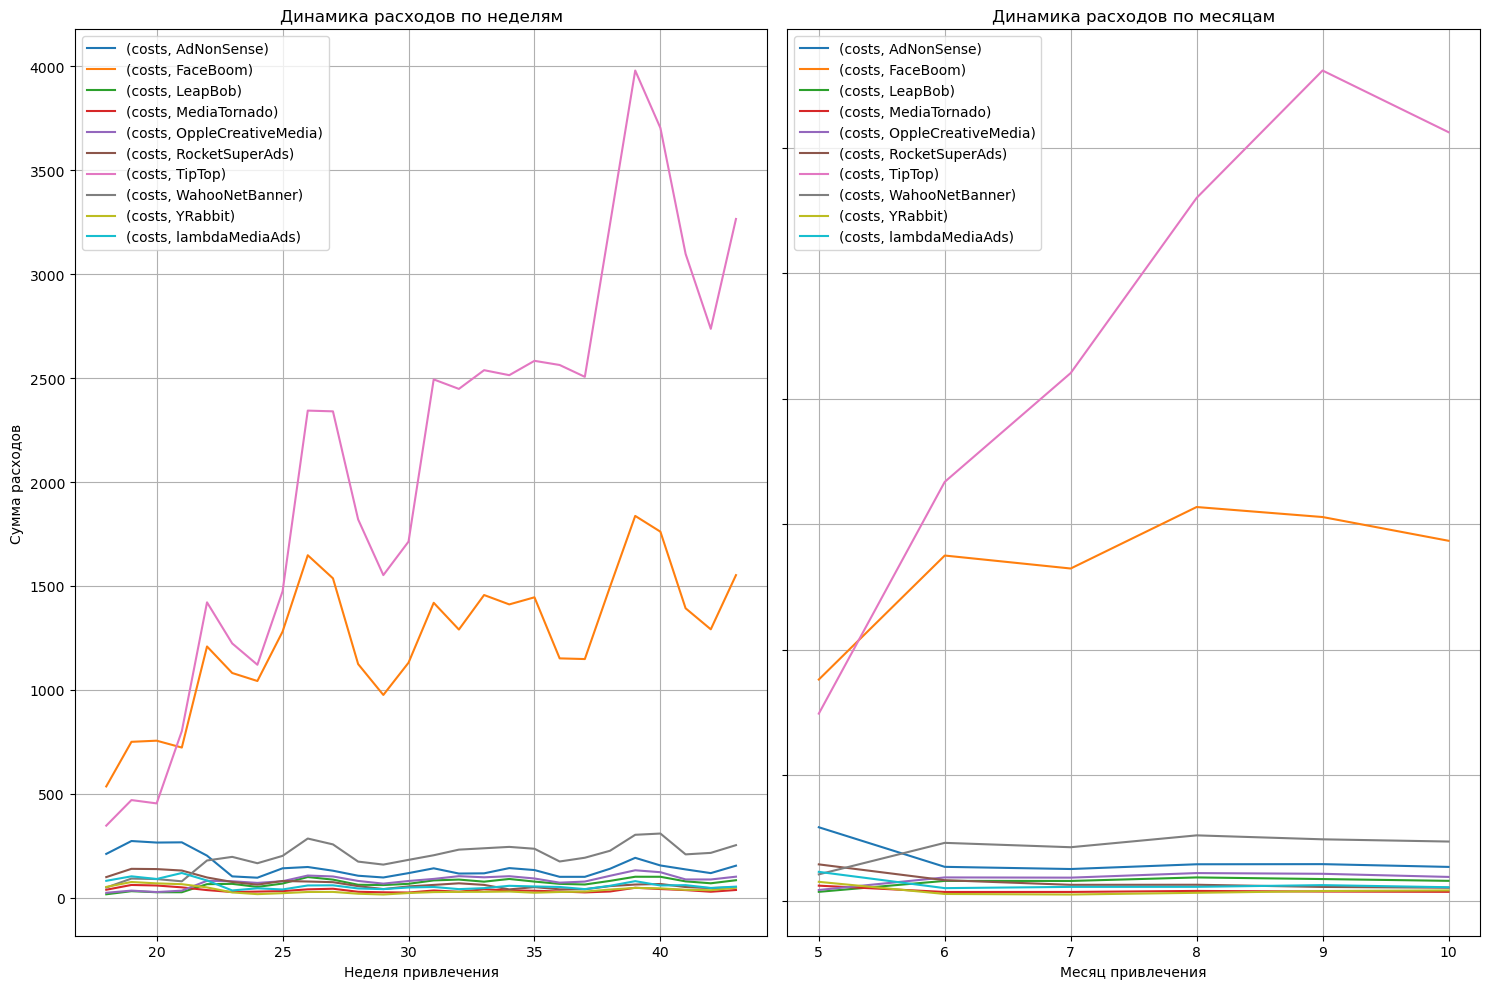

In [57]:
# Строим графики
plt.figure(figsize=(15, 10))

ax1 = plt.subplot(1, 2, 1)
weekly_costs.droplevel('year').plot(grid=True, ax=ax1)
plt.title('Динамика расходов по неделям')
plt.xlabel('Неделя привлечения')
plt.ylabel('Сумма расходов')
plt.legend()

ax2 =plt.subplot(1, 2, 2)
monthly_costs.droplevel('year').plot(grid=True, ax=ax2, sharey=ax1)
plt.title('Динамика расходов по месяцам')
plt.xlabel('Месяц привлечения')
plt.ylabel('Сумма расходов')
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
# Считаем расходы на 18 и 43 неделе
costs_18 = weekly_costs.loc[(2019, 18), 'costs']
costs_43 = weekly_costs.loc[(2019, 43), 'costs']

# Считаем насколько выросли расходы 
growth = costs_43 / costs_18

# Создаем таблицу
result = pd.DataFrame({
    'costs_18': costs_18,
    'costs_43': costs_43,
    'growth': growth
}).reset_index()

# Считаем насколько выросли расходы у каналов TipTop и FaceBoom
# Остальные каналы не берем в расчет, потому что там у них низкие расходы.
filtered_result = result[result['channel'].isin(['FaceBoom', 'TipTop'])].sort_values(by='growth', ascending=False)

display(filtered_result)

channel  costs_18  costs_43    growth
6    TipTop     347.0    3265.5  9.410663
1  FaceBoom     535.7    1552.1  2.897331

Выводы:

1. Динамика рекламных расходов по неделям и месяцам:
    - TipTop: резкое увеличение расходов, начиная с 20 недели, с пиками на 26, 32 и 39 неделях. Расходы на рекламу выросли в 9.4 раза (с 347.00 до 3265.50).
    - FaceBoom: увеличение расходов, начиная с 22 недели, с пиками на 26 и 39 неделях. Расходы на рекламу выросли в 2.9 раза (с 535.70 до 1552.10).
    - все остальные каналы: низкие, но относительно стабильные рекламные расходы в течение всего времени. 

**4.4. Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.**

Средний CAC на одного пользователя: 1.13 



acquisition_cost  abs_deviation
channel                                            
TipTop                      2.799003       1.671522
FaceBoom                    1.113286      -0.014196
AdNonSense                  1.008054      -0.119427
lambdaMediaAds              0.724802      -0.402679
WahooNetBanner              0.602245      -0.525236
RocketSuperAds              0.412095      -0.715386
OppleCreativeMedia          0.250000      -0.877481
YRabbit                     0.218975      -0.908506
MediaTornado                0.218717      -0.908765
LeapBob                     0.210172      -0.917309

'\n'

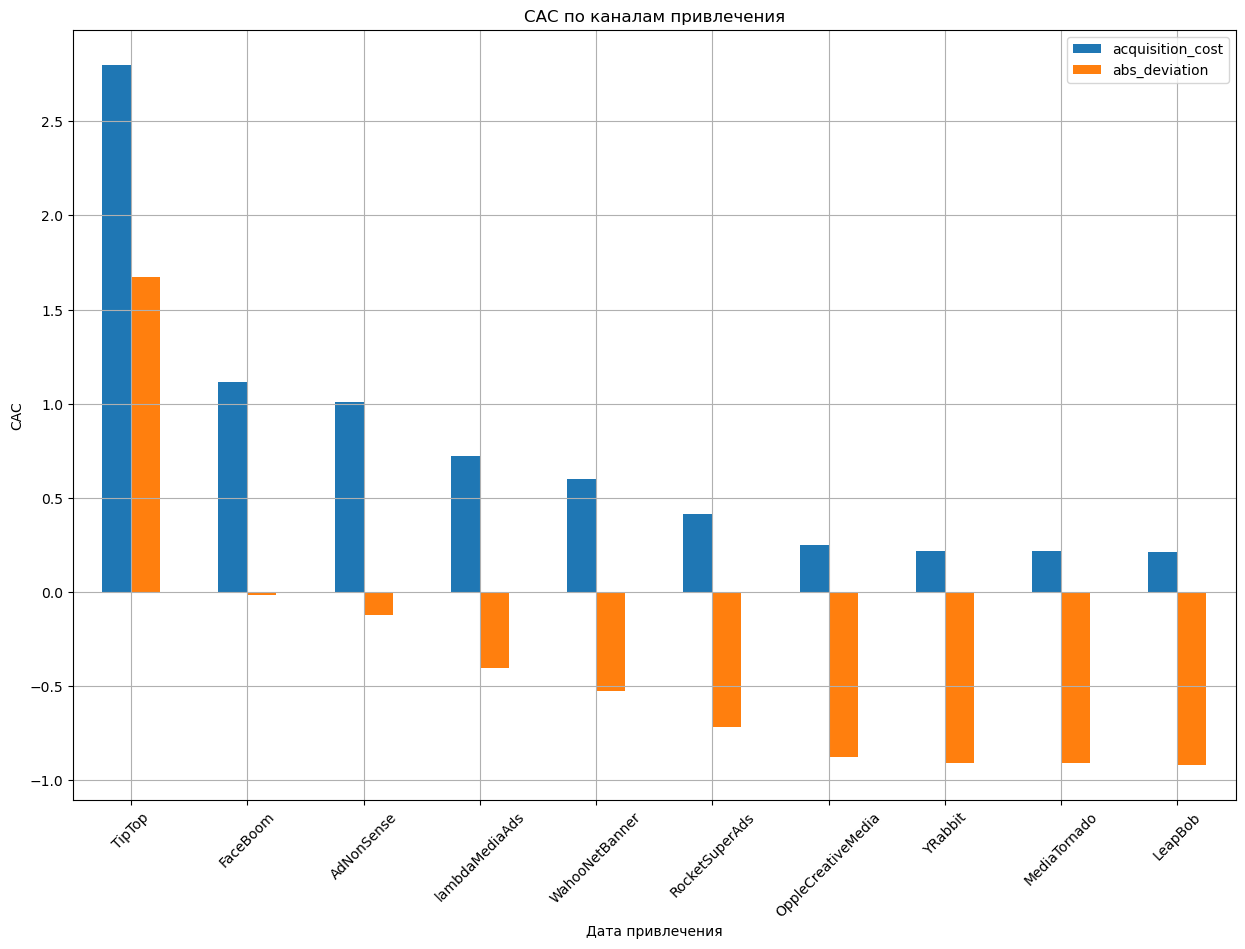

In [61]:
# Исключаем органический канал из данных, за клиентов канала organic мы не платим
paid_profiles = profiles[profiles['channel'] != 'organic']

# Рассчет среднего CAC для всего проекта
avg_cac = paid_profiles['acquisition_cost'].mean()
print(f'Средний CAC на одного пользователя: {avg_cac:.2f}', '\n')

# Строим график CAC по каналам привлечения
cac_per_channel = paid_profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
).sort_values(by='acquisition_cost', ascending=False)

# Добавляем столбец с отклонением в абсолютном значении
cac_per_channel['abs_deviation'] = cac_per_channel['acquisition_cost'] - avg_cac

display(cac_per_channel, '\n')

cac_per_channel.plot(kind='bar', grid=True, figsize=(15, 10))

plt.title('САС по каналам привлечения')
plt.xlabel('Дата привлечения')
plt.ylabel('CAC')

plt.xticks(rotation=45)

plt.show()

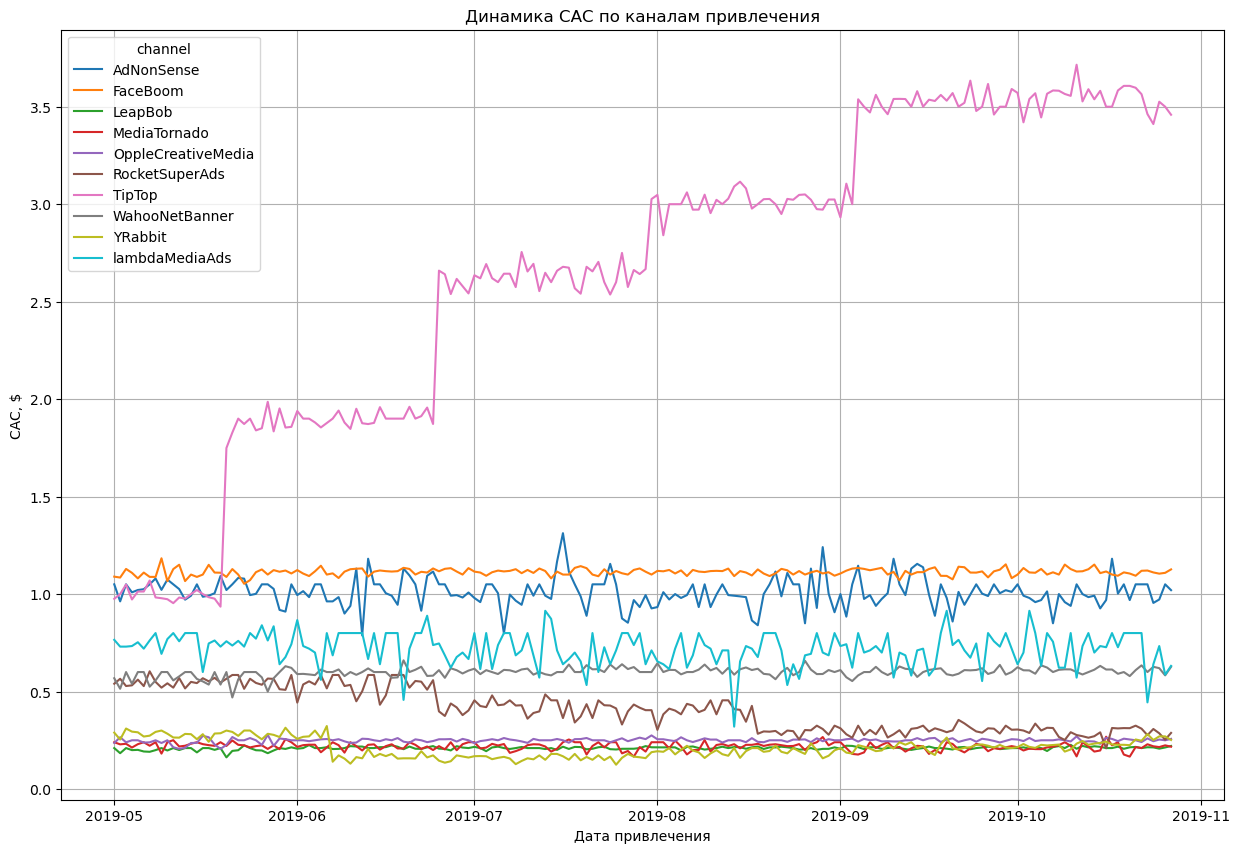

Динамика CAC канала привлечения TipTop 
 dt
2019-05-01    0.975610
2019-05-02    1.000000
2019-05-03    1.049180
2019-05-04    0.972222
2019-05-05    1.012987
                ...   
2019-10-23    3.462366
2019-10-24    3.411017
2019-10-25    3.525547
2019-10-26    3.500000
2019-10-27    3.458824
Name: TipTop, Length: 180, dtype: float64


In [62]:
# Строим график истории изменений CAC по каналам привлечения
cac_history1 = paid_profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
)
cac_history1.plot(grid=True, figsize=(15, 10))

plt.title('Динамика САС по каналам привлечения')
plt.xlabel('Дата привлечения')
plt.ylabel('CAC, $')

plt.show()

print('Динамика CAC канала привлечения TipTop \n', cac_history1['TipTop'])

Выводы:

1. CAC по каналам привлечения:
    - Высокая CAC: TipTop (2.80), FaceBoom (1.11), AdNonSense (1.01) - эти каналы с высоким отклонением от среднего CAC. У TipTop CAC в 4 раза больше чем среднее значение, у FaceBoom - в 1.6 раза.
    - Средняя CAC: lambdaMediaAds (0.72), WahooNetBanner (0.60).
    - Низкая CAC: RocketSuperAds (0.41), OppleCreativeMedia (0.25), YRabbit (0.22), MediaTornado (0.22), LeapBob (0.21).
    
2. Динамика CAC:
    - Канал TipTop значительно выделяется с резким ростом затрат в 3.5 раза (с 0.97 до 3.45).
    - Остальные каналы сохраняют относительную стабильность.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

**5.1. Посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().**

Исключаем органический трафик, поскольку мы за них ничего не платим. Всю оценку окупаемости рекламы для привлечения пользователей, рассчитываем по пользователям, пришедшим с платныx рекламныx каналов.  

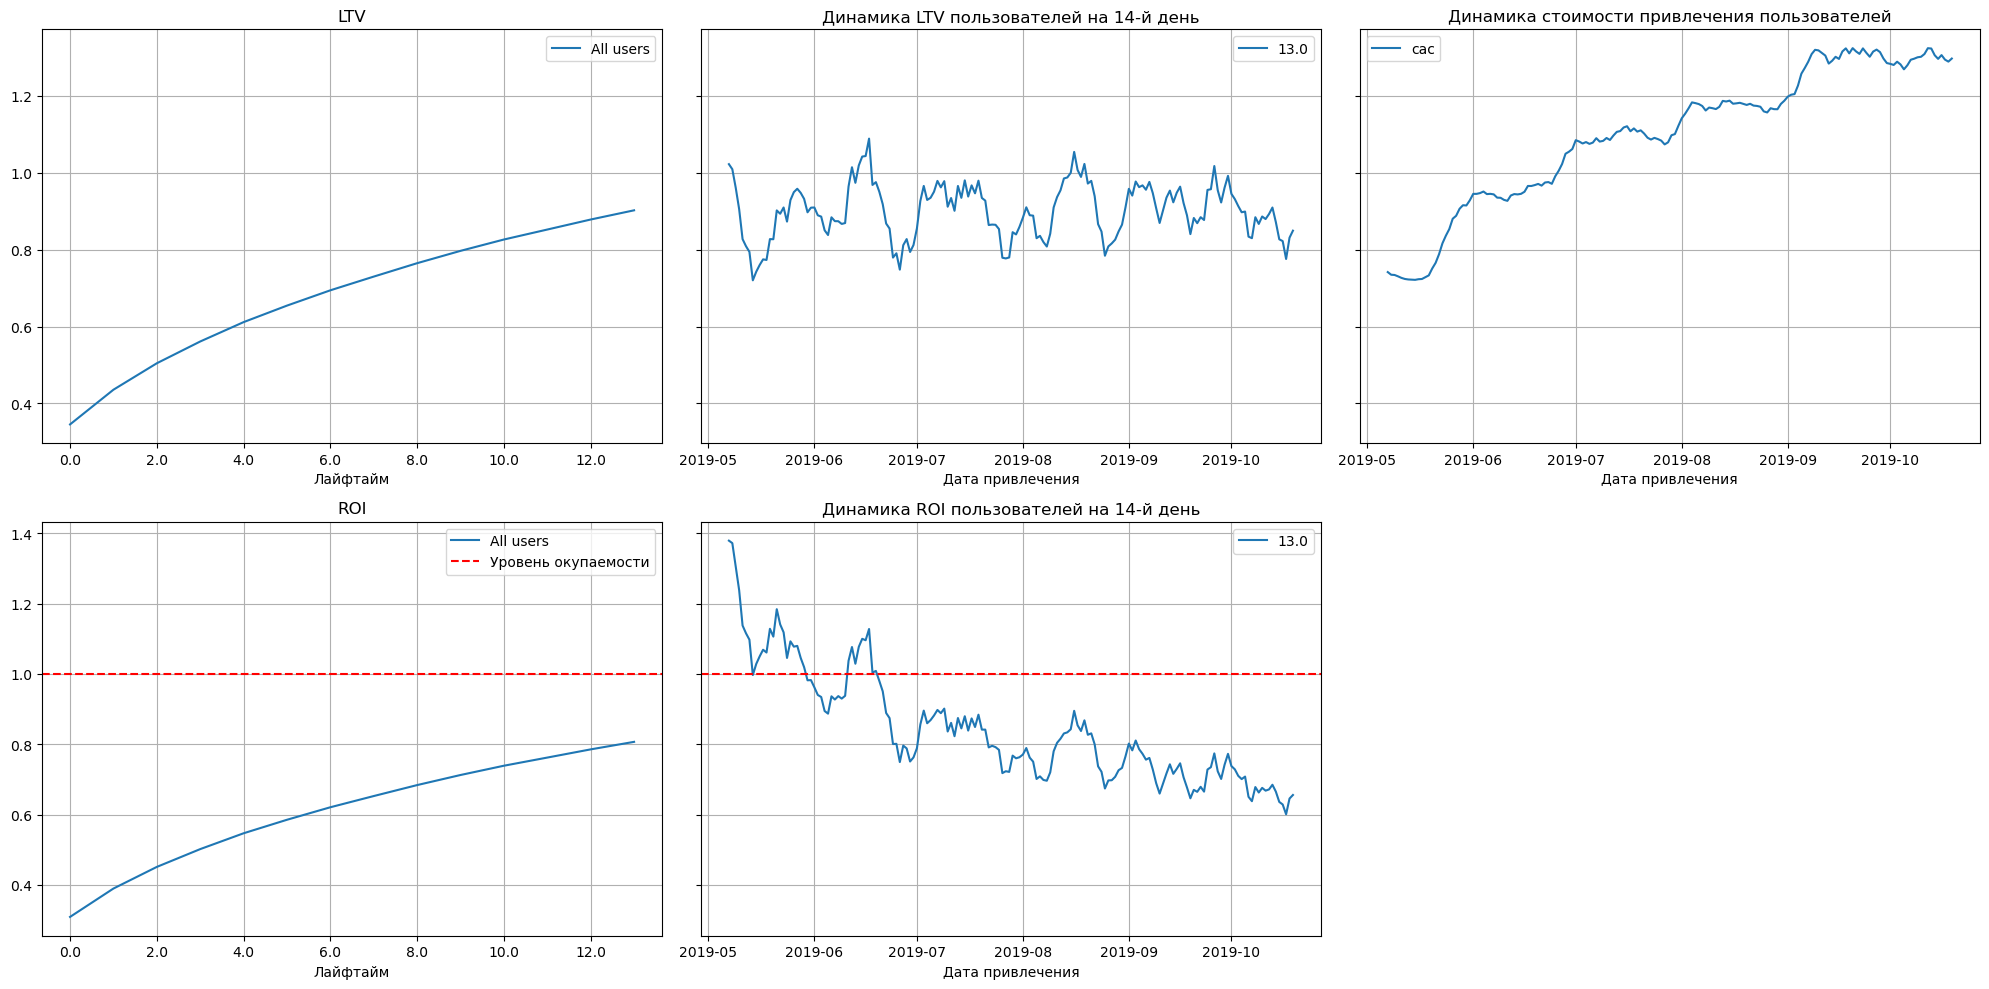

In [67]:
# Задаем параметры анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

# Считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days
)

# Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

In [68]:
# Считаем средний LTV за 14-й день
ltv_history[13].mean()

0.902961237356002

Выводы:
- **LTV**: растет с течением времени.
- **Динамика LTV на 14 день**: несмотря на колебания, остается стабильным в районе 0.9.
- **CAC**: начал расти с конца мая и вырос в 1.7 раза (с 0.78 до 1.33). 
- **ROI на 14 день**: снижается, реклама перестала окупаться в конце мая. Это связано с резким увеличением CAC в этот период. 

**5.2. Проверим конверсию пользователей и динамику её изменения. Проверим удержание пользователей и динамику ее изменения. Построим и изучим графики конверсии и удержания.**

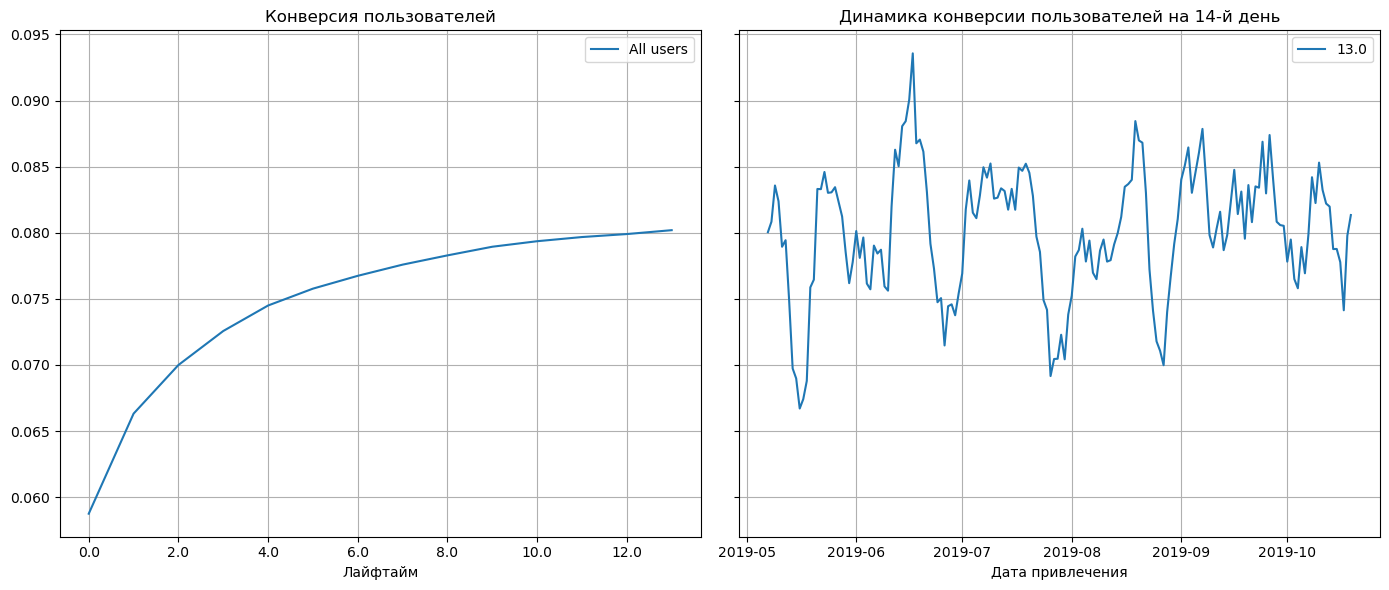

In [71]:
# Считаем конверсию 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days
)

# Строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Выводы:
- Конверсия в течение 2 недель растет, что является положительным сигналом для бизнеса.

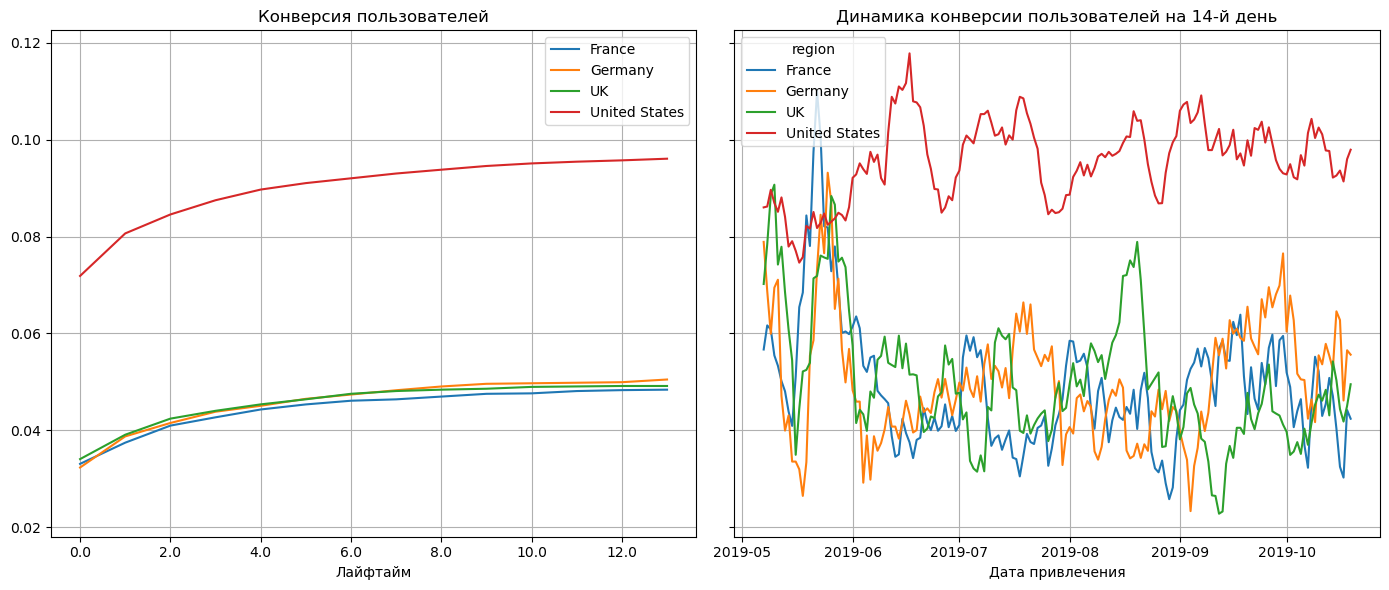

In [73]:
# Считаем конверсию по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# Строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Выводы:
- Конверсия постепенно растет во всех странах:
    - в США самая большая конверсия – выросла с 7.18% до 9.60%. 
    - в Великобритании, Франции и Германии конверсия примерно на одном уровне - выросла с 3.33% до 4.90%.
- Динамика конверсии:
    - В США конверсия на 14 день растет с течением временем, у остальных стран наоборот.

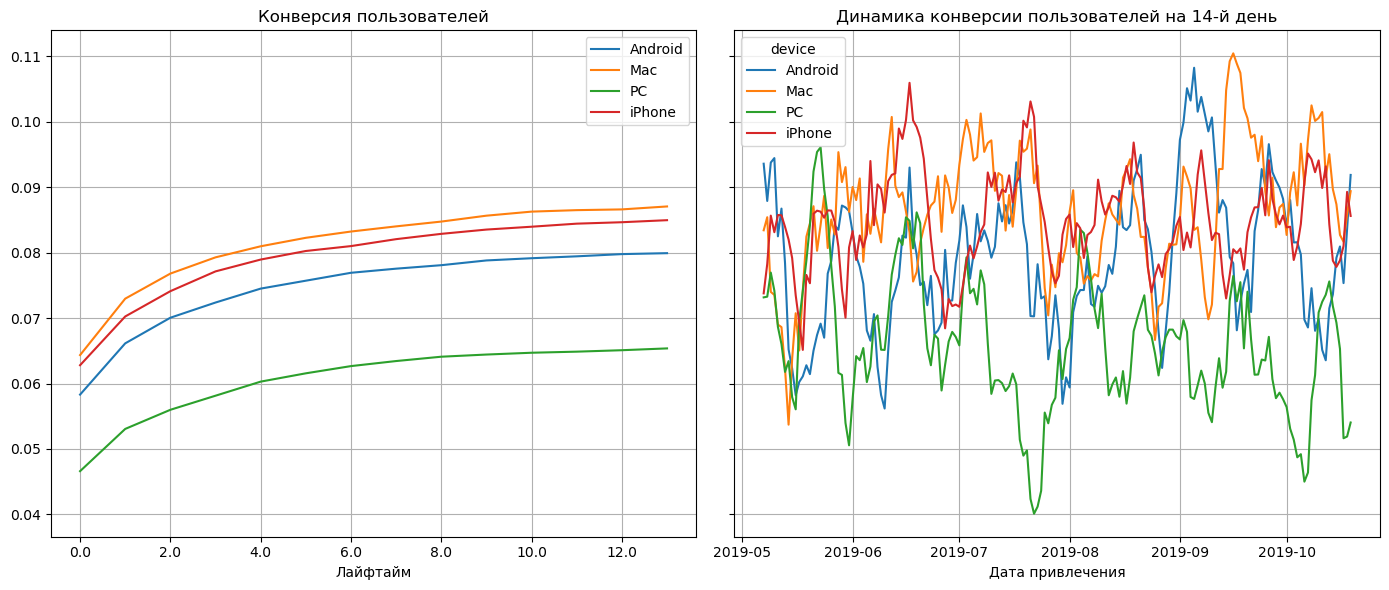

In [75]:
# Считаем конверсию по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days, dimensions=['device']
)

# Строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Выводы:
- Конверсия постепенно растет у всех устройств:
    - Mac и iPhone самые большие показатели конверсии – рост с 6.4% до 8.7% у Mac и с 6.2% до 8.4% у iPhone. 
    - Android - рост с 5.8% до 7.9%.
    - PC - рост с 4.6% до 6.5%.
- Динамика конверсии:
    - Mac и iPhone конверсия на 14 день более стабильна, у Android и PC разбросы в значениях больше.

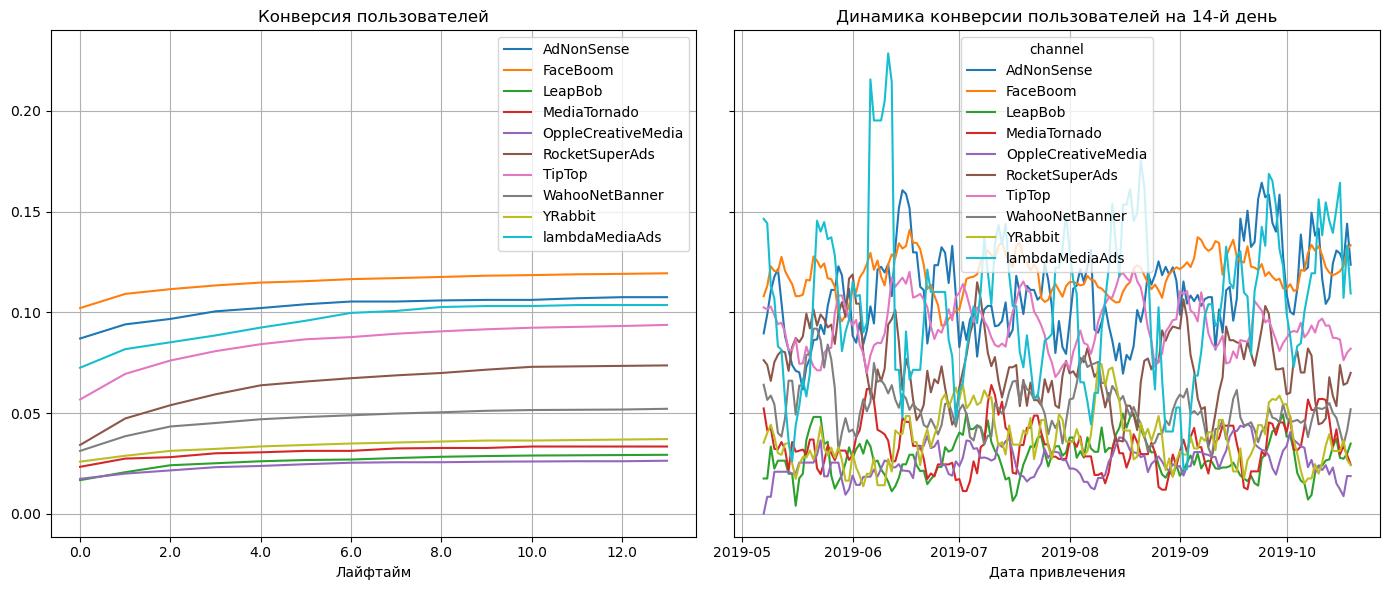

In [77]:
# Считаем конверсию по рекламным кампаниям
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

# Строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days)

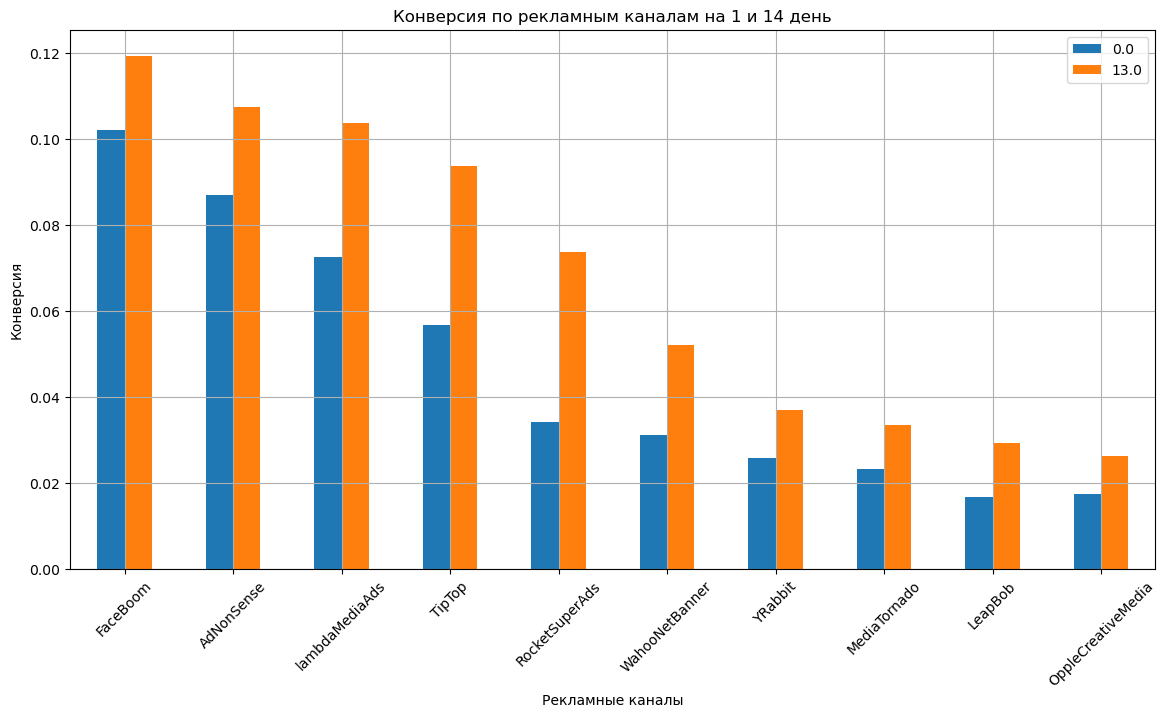

In [78]:
# Смотрим насколько выросла конверсия по каналам
conversion_by_channel = conversion_grouped[[0, 13]].copy()
conversion_by_channel_sorted = conversion_by_channel.sort_values(by=13, ascending=False)

# Строим график
conversion_by_channel_sorted[[0, 13]].plot(kind='bar', figsize=(14, 7), grid=True)

plt.title('Конверсия по рекламным каналам на 1 и 14 день')
plt.xlabel('Рекламные каналы')
plt.ylabel('Конверсия')

plt.xticks(rotation=45)

plt.show()

Выводы:
- Конверсия по рекламным каналам:
    - FaceBoom, AdNonSense являются наиболее эффективными каналами с наибольшей конверсией.
    - lambdaMediaAds, TipTop и RocketSuperAds показывают среднюю конверсию, но с хорошей динамикой роста.
    - WahooNetBanner, YRabbit, MediaTornado, LeapBob и OppleCreativeMedia показывают низкую конверсию.

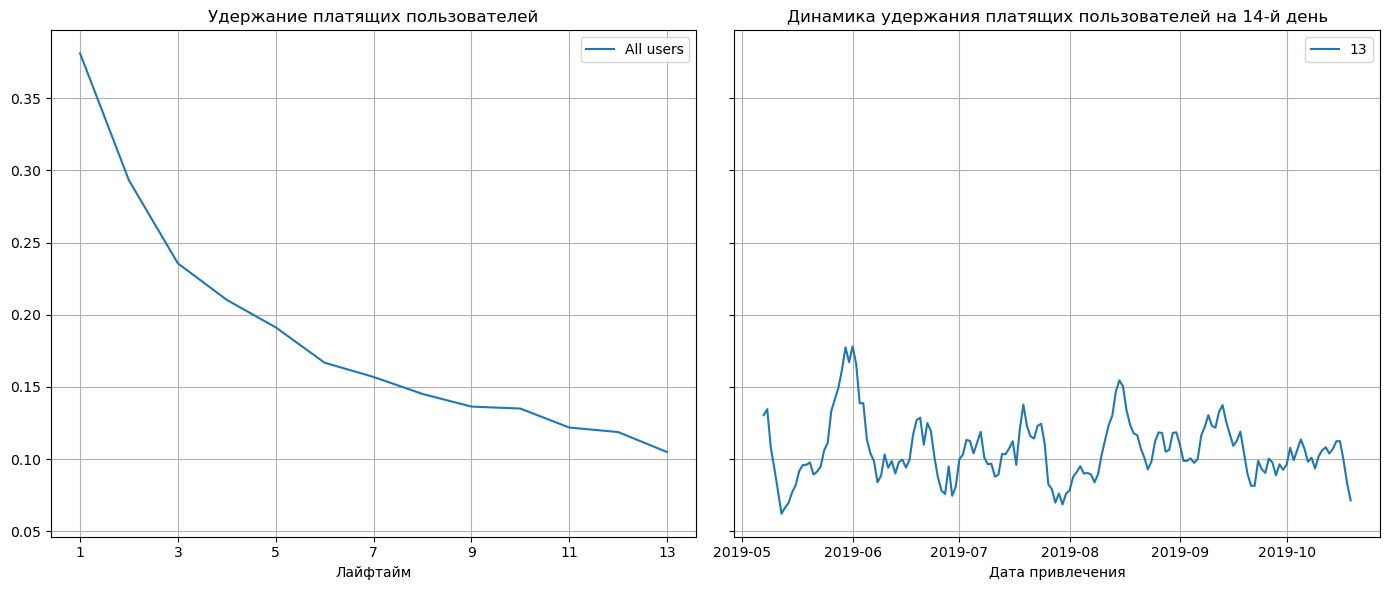

In [80]:
# Считаем удержание

retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days
)

# Строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы:
- Удержание платящих пользователей снижается в течение 2 недель с 3.8% до 1.0%.

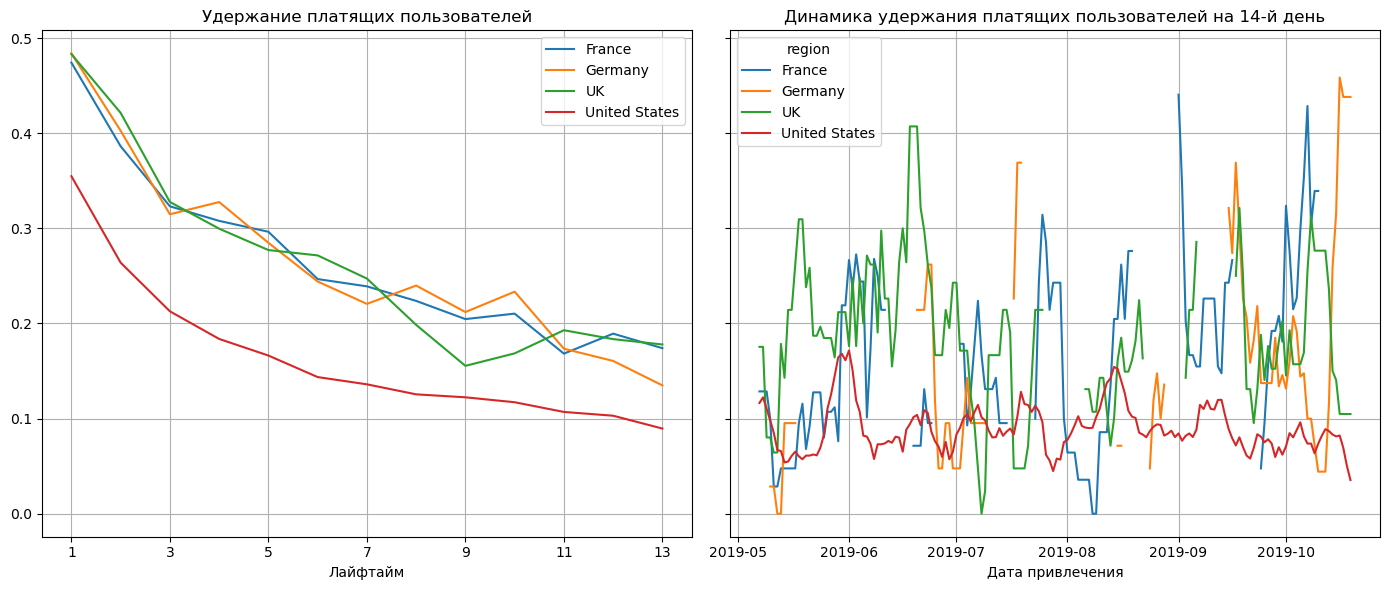

In [82]:
# Считаем удержание по странам

retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days, dimensions=['region']
)

# Строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы:
- Удержание по странам:
    - Великобритания, Германия и Франция имеют схожие графики удержаний: на 1 день жизни удержание примерно равно 48% и к 14 дню падает до 17% у Великобритании, Франции и до 14% у Германии.
    - США имеет низкое удержание: 35% в первый день и 9% к 14 дню. Это мало, учитывая, что треть всех пользователей из США и 7% платящих тоже.

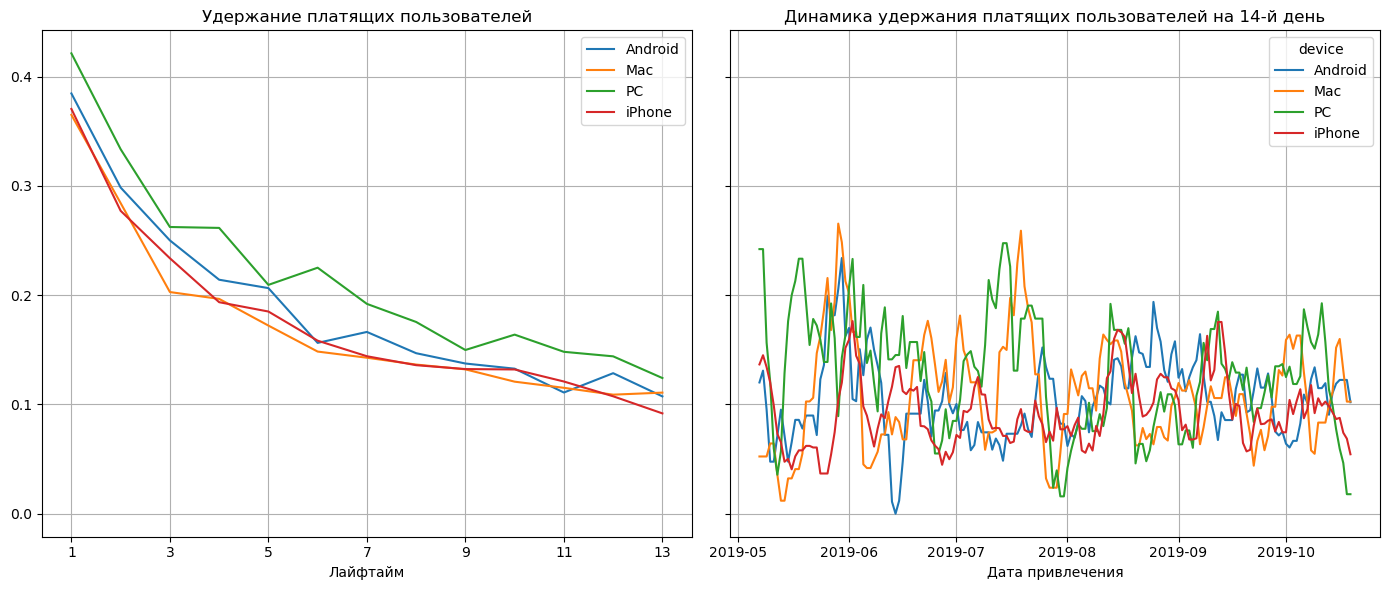

In [84]:
# Считаем удержание по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days, dimensions=['device']
)

# Строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы:
- Удержание по устройствам:
    - PC показывает лучший результат удержания в начале - 42%, но в течение 2 недель удержание почти совпадает с остальными устройствами - 12%.
    - Устройства Android, iPhone и Mac показывают схожие показатели удержания: 36-38% в 1 день, 9-11% на 14 день.

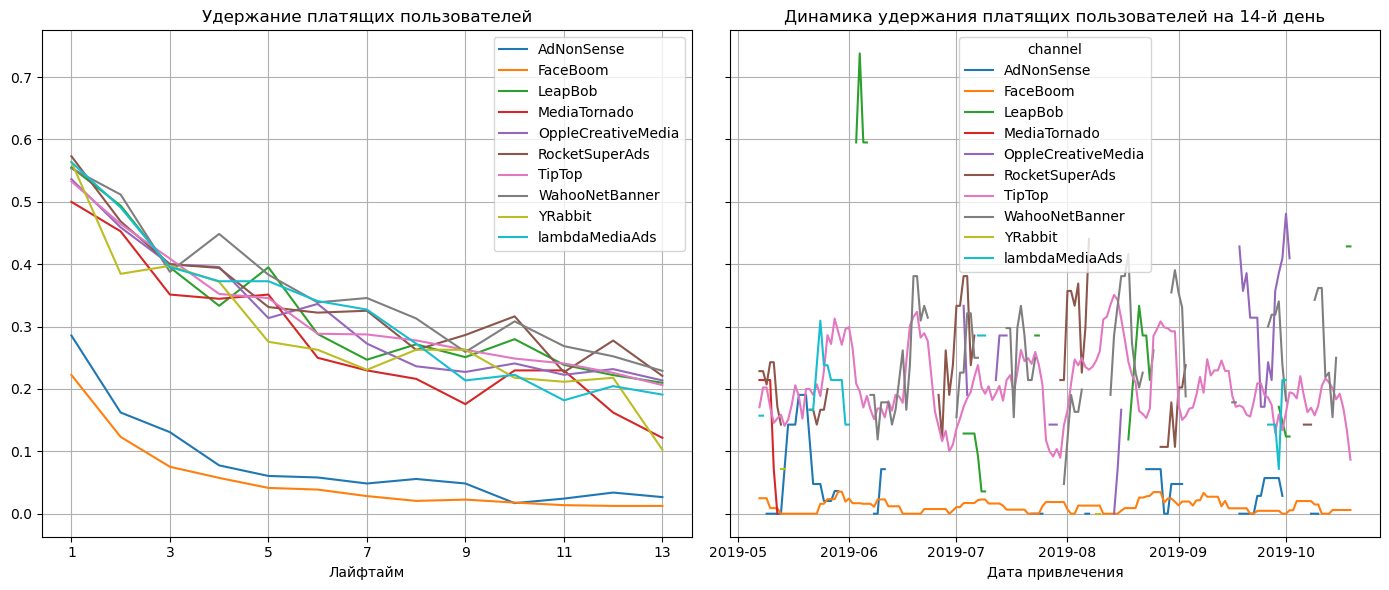

In [86]:
# Считаем удержание по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

# Строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

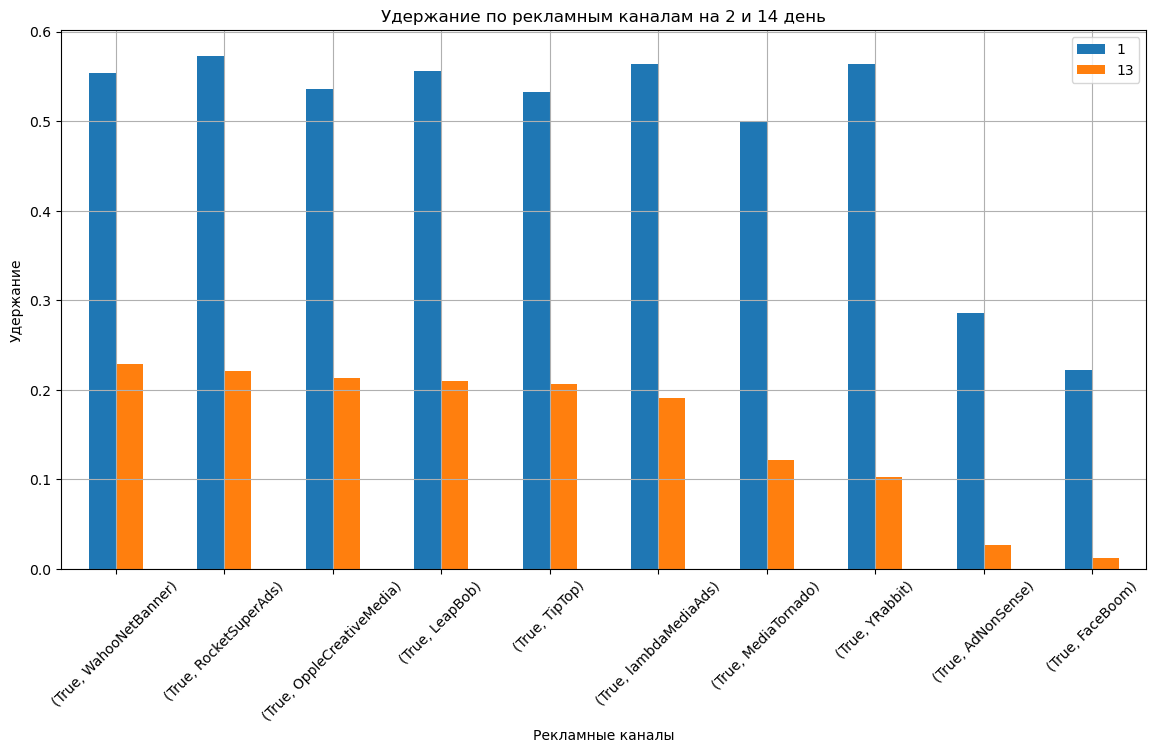

In [87]:
# Считаем насколько снизилось удержание по рекламным каналам
retention_by_channel = retention_grouped[[1, 13]].query('payer == True').copy()
retention_by_channel_sorted = retention_by_channel.sort_values(by=13, ascending=False)

# Строим график
retention_by_channel_sorted[[1, 13]].plot(kind='bar', figsize=(14, 7), grid=True)

plt.title('Удержание по рекламным каналам на 2 и 14 день')
plt.xlabel('Рекламные каналы')
plt.ylabel('Удержание')

plt.xticks(rotation=45)

plt.show()

Выводы:
- Удержание по рекламным каналам:
    - RocketSuperAds, WahooNetBanner, LeapBob, и lambdaMediaAds демонстрируют наиболее высокое удержание на протяжении 13 дней.
    - AdNonSense и FaceBoom показывают худшие результаты по удержанию.

**5.3. Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

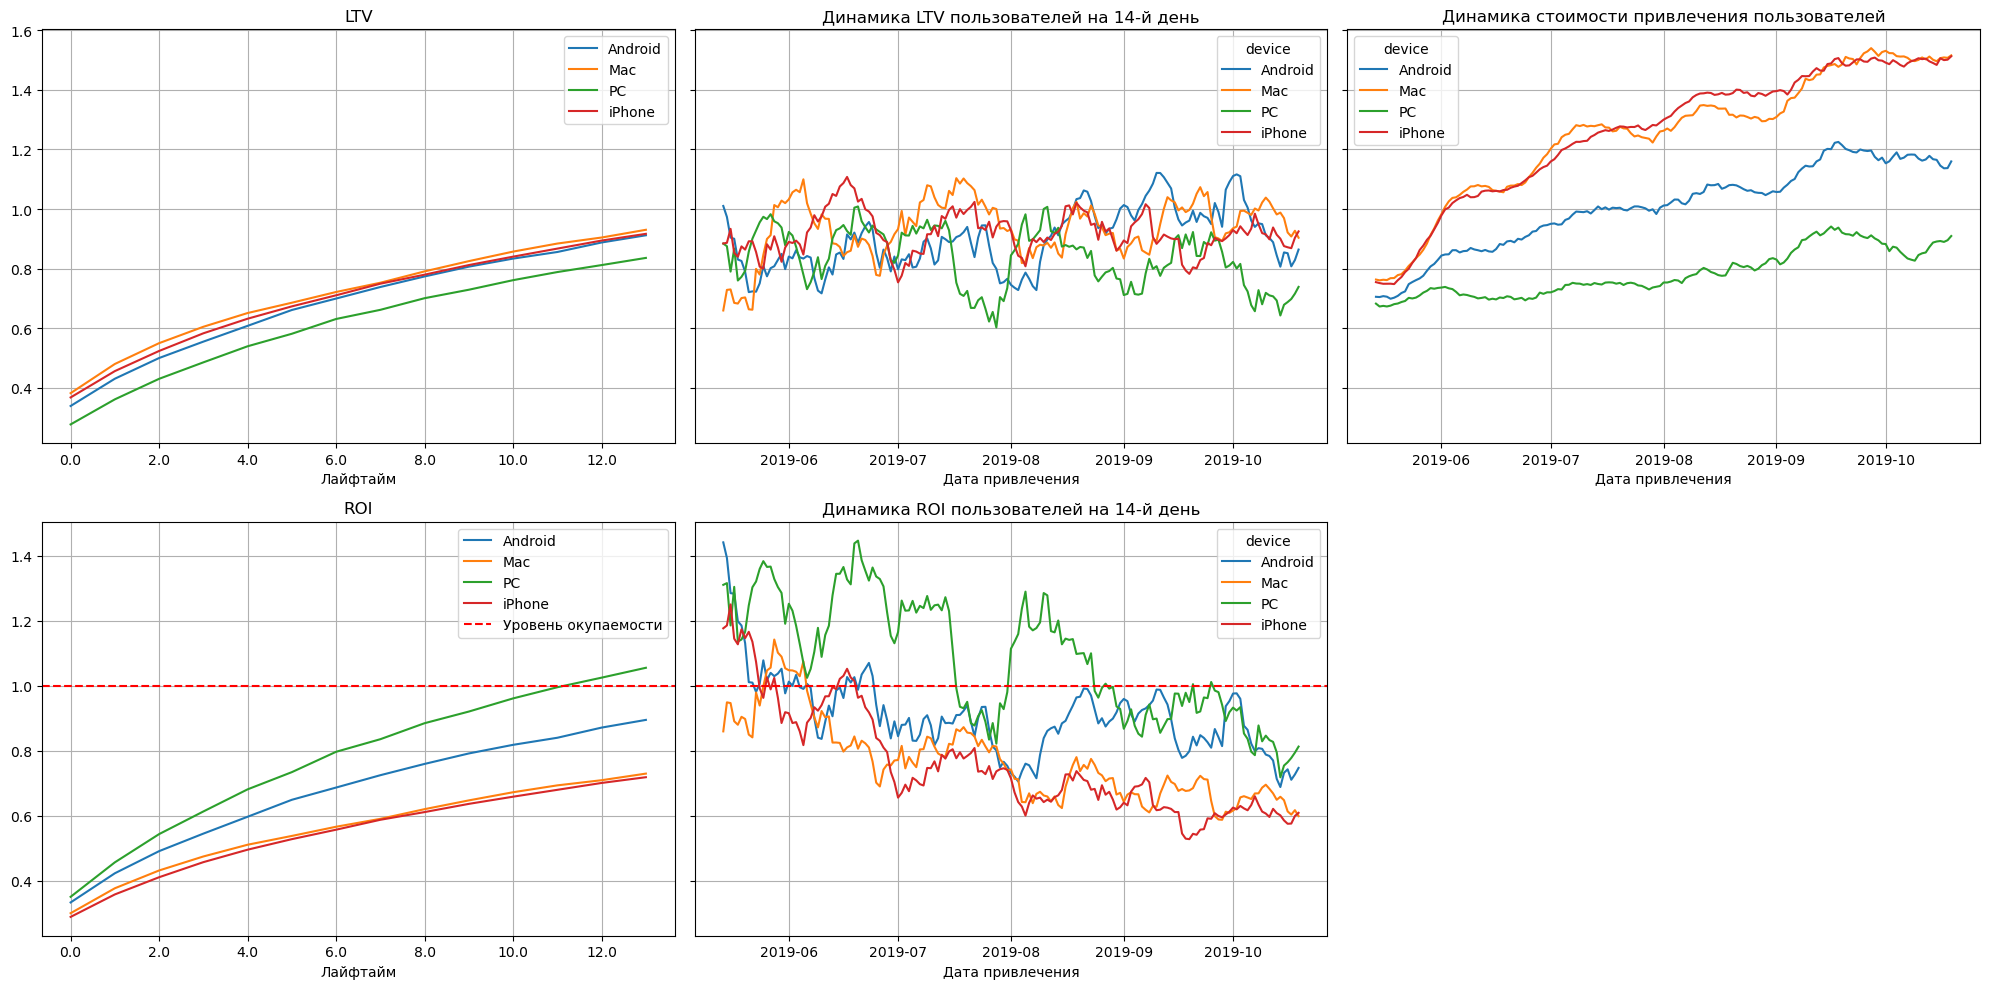

In [90]:
# Считаем окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# Строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Выводы:
1. **LTV** растет у всех устройств.
    - LTV на 14 день у Mac (0.93), у Android и iPhone (0.91) почти одинаковый.
    - у PC - 0.83.
    
    
2. **Динамика LTV на 14 день**: 
    - PC: заметные падения LTV в конце июля и октября. Это может быть связано с сезонными факторами.
    - iPhone, Mac, Android: LTV для этих устройств остается более стабильным, с менее выраженными колебаниями.
    
    
3. **CAC** резко вырос в конце мая:
    - iPhone и Mac: похожая динамика роста, CAC вырос больше всех в 2 раза (с 0.75 до 1.5). 
    - Android: CAC вырос с 1.7 раза (с 0.7 до 1.2). 
    - PC: CAC вырос в 1.3 раза (с 0.68 до 0.9).
    
    
4. **ROI**: 
    - пользователи PC окупаются на 11 день жизни. 
    - пользователи Android, iPhone и Mac не окупаются в течение 2 недель.
    
    
5. **Динамика ROI на 14 день**: 
    - PC: в конце июля и начиная с конца августа ROI не был положительным. Это связано с падением LTV и одновременным ростом CAC в эти периоды.
    - iPhone, Android: были прибыльными до конца мая, потом ROI стал отрицательным. Это связано с ростом CAC в это время.
    - Mac: почти все время (не считая конец мая и начало июня) ROI оставался отрицательным. Это означает, что на протяжении всего периода расходы на привлечение клиентов превышали доходы.

**5.4. Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

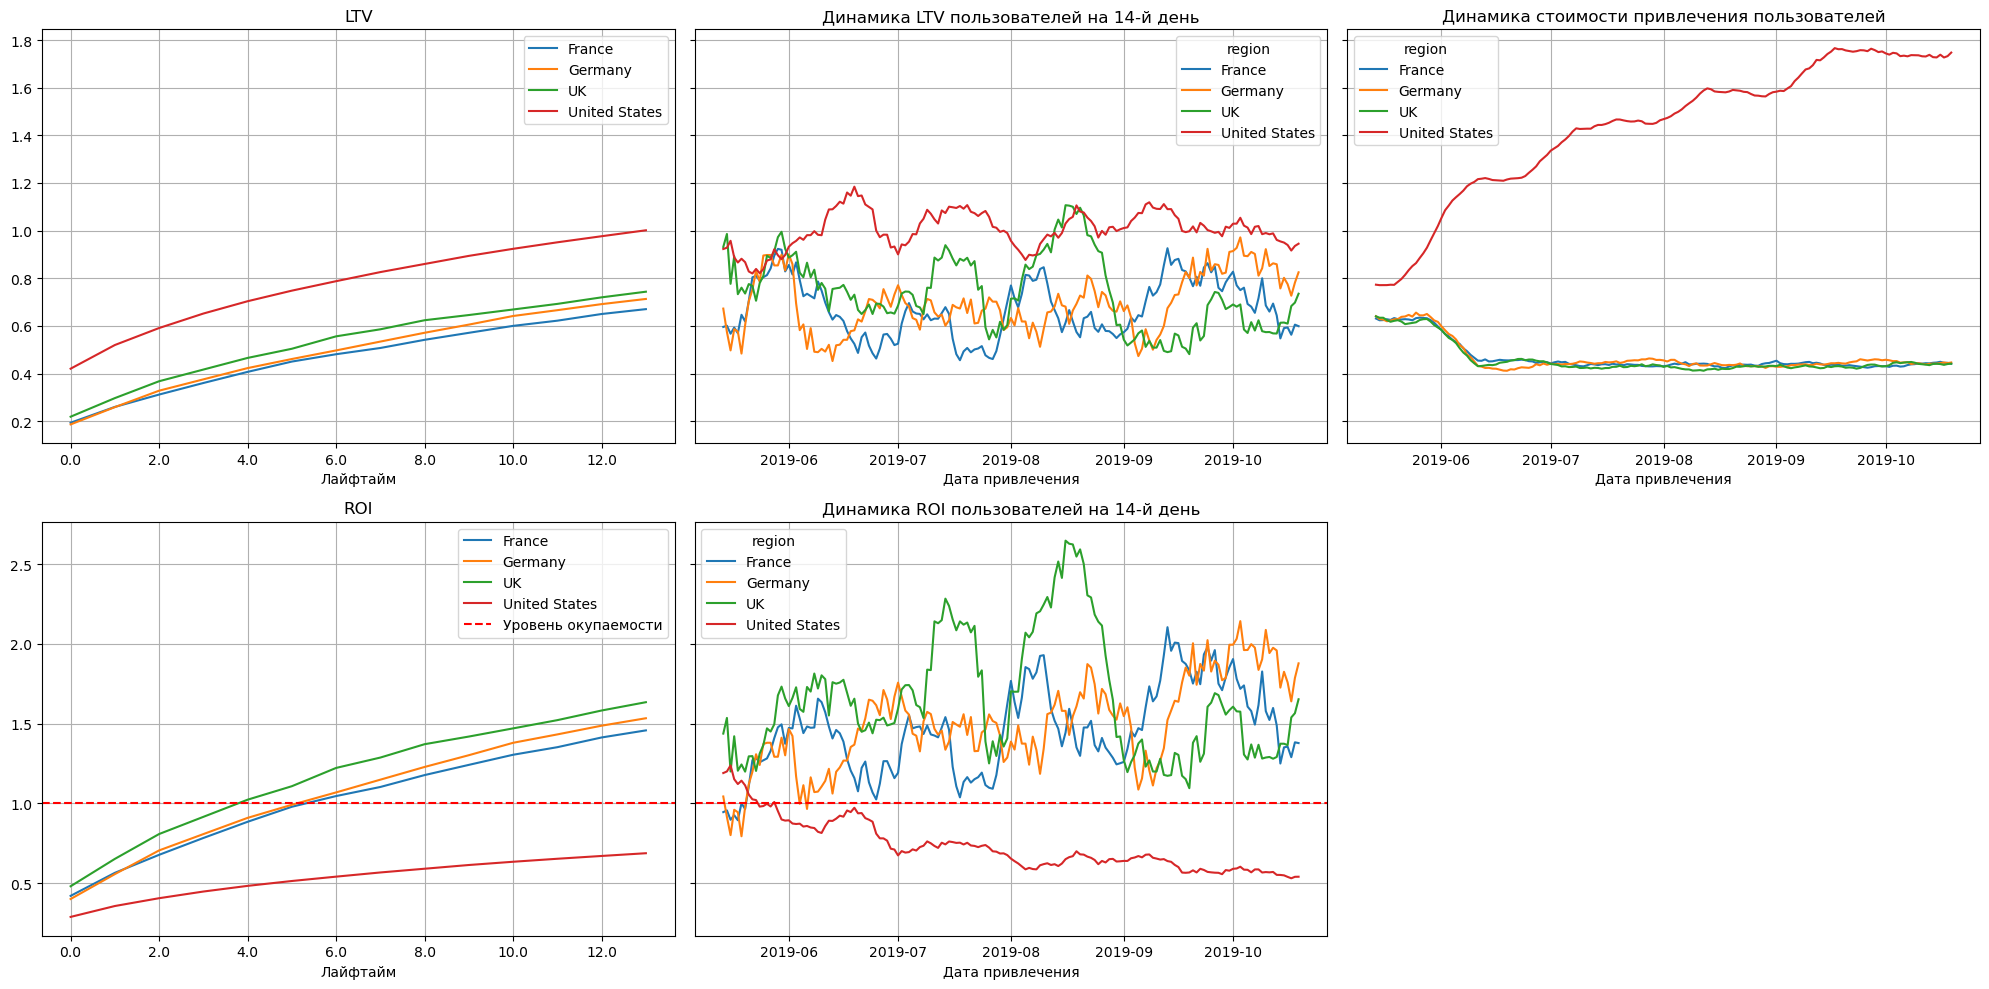

In [93]:
# Смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# Строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. **LTV**: растет у всех устройств.
    - у США самый высокий LTV на 14 день - 1.00.
    - у Великобритании - 0.74.
    - у Германии - 0.71.
    - у США - 0.67.
    
    
2. **Динамика LTV на 14 день**: 
    - Все страны: динамика LTV на 14-й день, несмотря на колебания, остается примерно на одном уровне.
    
    
3. **CAC** резко вырос в конце мая:
    - США: CAC вырос в 2.1 раза (с 0.8 до 1.7). 
    - Великобритания, Германия и Франция: CAC наоброт упал в 1.5 раза (с 0.6 до 0.4 в начале июня, потом стабилизировался на уровне 0.4.).
    
    
4. **ROI и его динамика**: 
    - пользователи из Великобритании окупаются на 4 день жизни. 
    - пользователи из Германии и Франции на 5 день.
    - пользователи США не окупаются в течение 2 недель.
    
    
5. **Динамика ROI на 14 день**: 
    - Великобритания, Германия, Франция: с конца мая ROI положительный.
    - США: в конце мая ROI стал отрицательным и продолжил падать до конца периода.

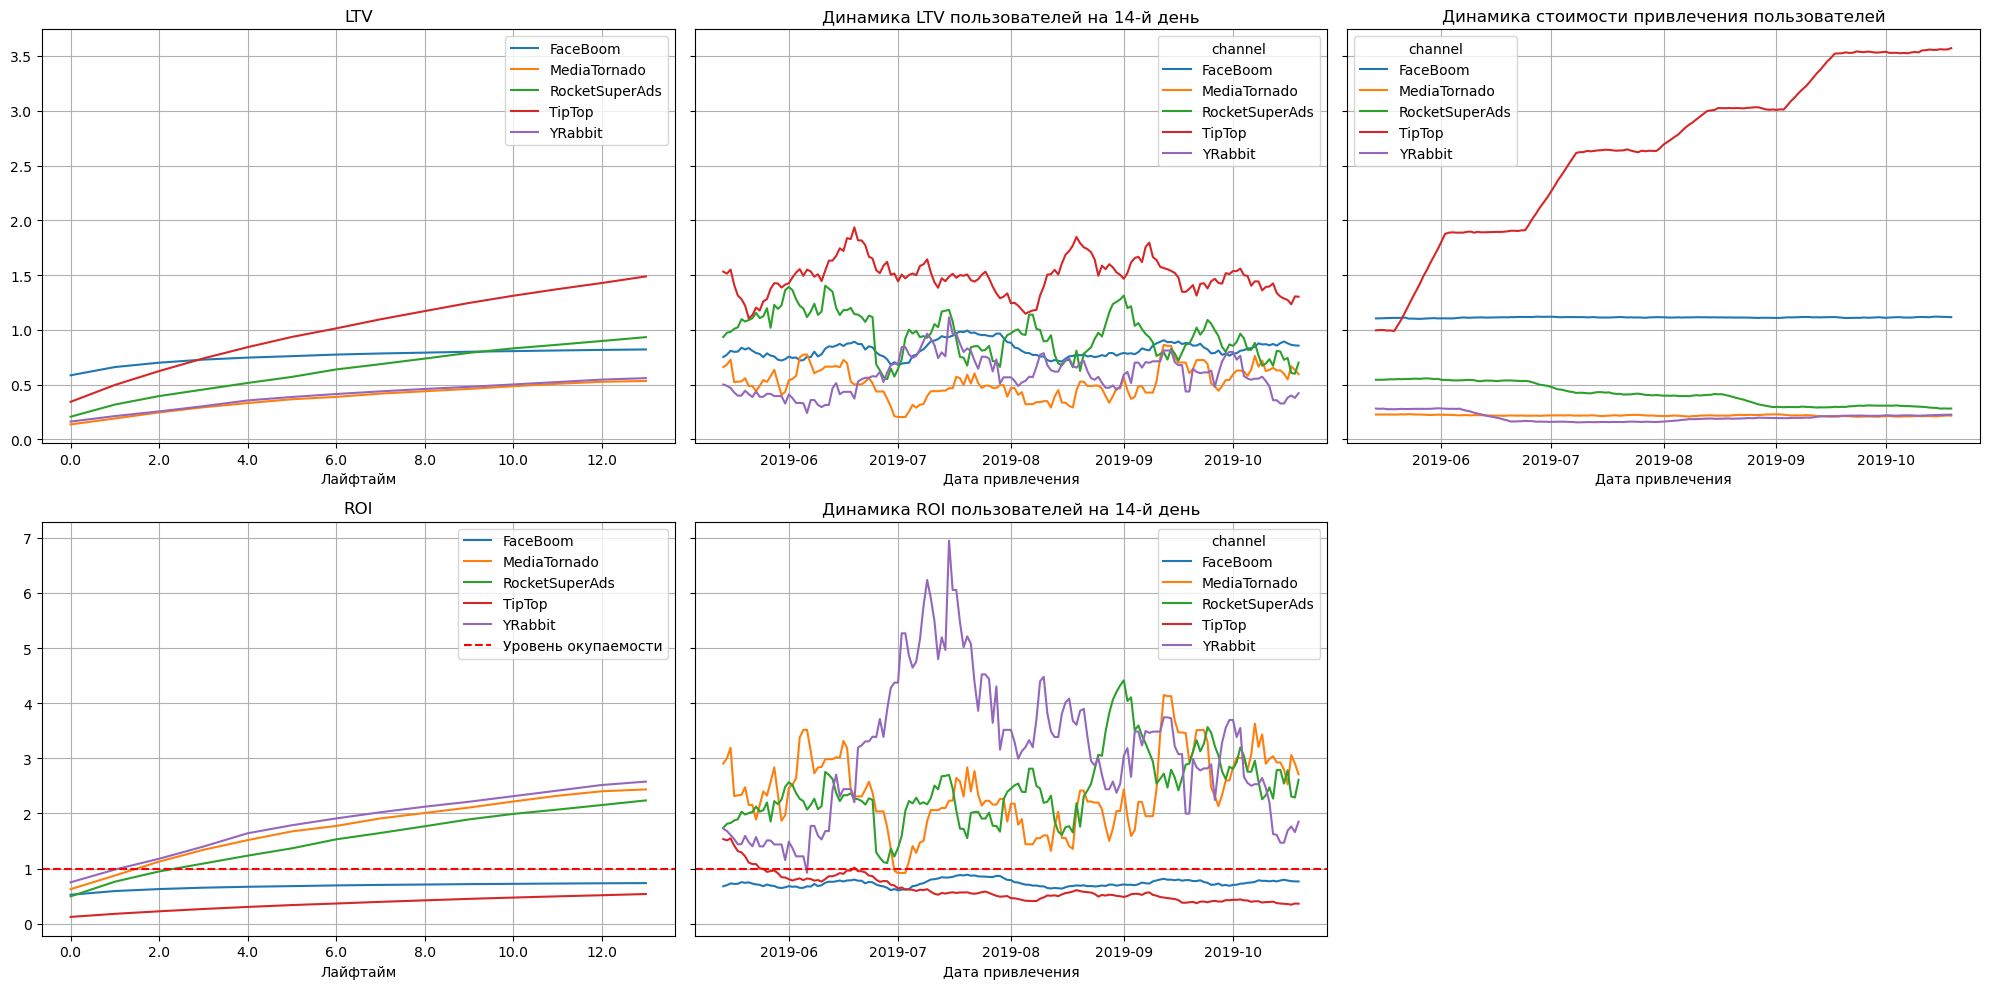

In [95]:
# Смотрим окупаемость США с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw_usa, ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa = get_ltv(
    paid_profiles.query("region == 'United States'"), orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa, horizon_days, window=14
)

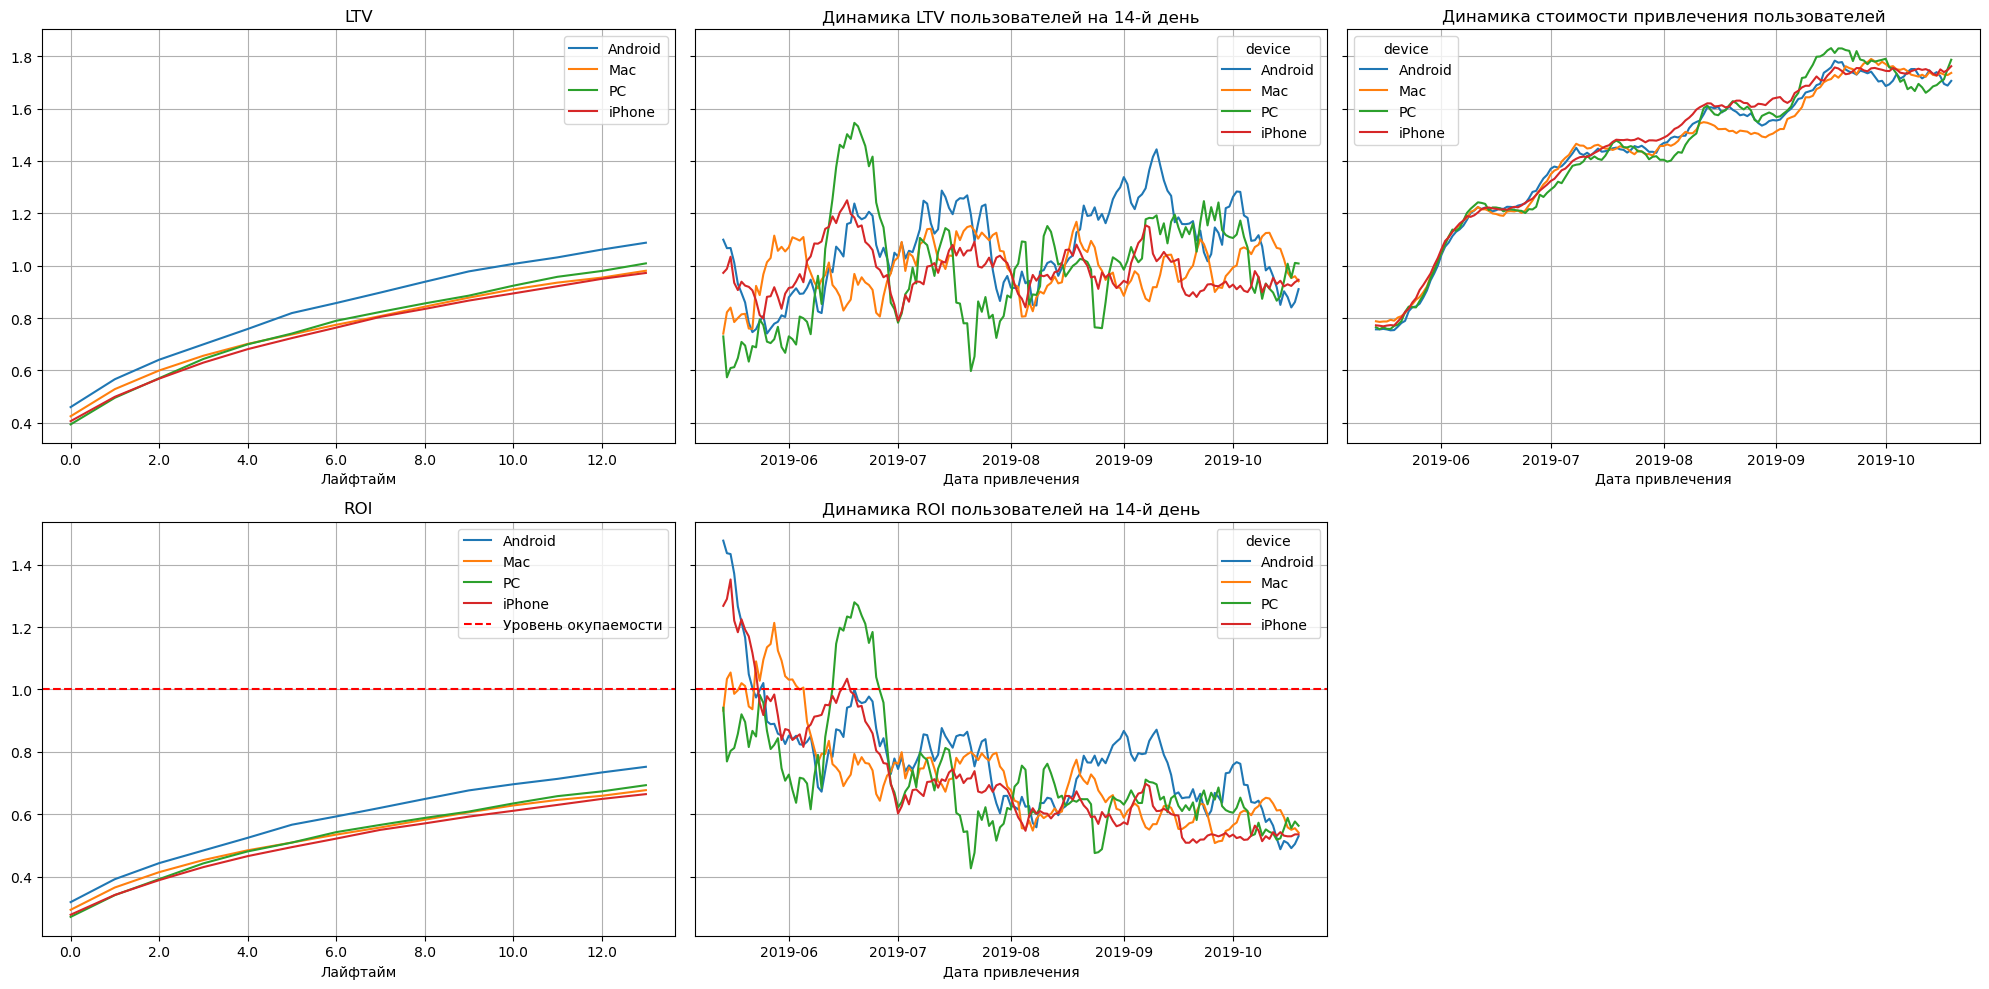

In [96]:
# Смотрим окупаемость США с разбивкой по устройствам

dimensions = ['device']

ltv_raw_usa, ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa = get_ltv(
    paid_profiles.query("region == 'United States'"), orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa, horizon_days, window=14
)

In [97]:
# Смотрим окупаемость США с разбивкой по устройствам и канлам

dimensions = ['device', 'channel']

ltv_raw_usa, ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa = get_ltv(
    paid_profiles.query("region == 'United States'"), orders, observation_date, horizon_days, dimensions=dimensions
)

In [98]:
# Считаем CAC и ROI на 14 день по устройствам и каналам для США

avg_cac = 0.70

# Функция для покраски значений в красный, если ROI меньше 1 для столбца 13
def color_red_ltv(val):
    color = 'red' if val < 1 else 'black' 
    return f'color: {color}'

# Функция для покраски значений в красный, если CAC больше 0.70 для столбца 'cac'
def color_red_cac(val):
    color = 'red' if val > avg_cac else 'black' 
    return f'color: {color}'

# Переименуем столбец 13 на 'roi_14_day'
roi_sorted = roi_grouped_usa[['cohort_size', 'cac', 13]].rename(columns={13: 'roi_14_day'})

# Сортировка для наглядности
roi_sorted = roi_sorted.sort_values(by=['device', 'roi_14_day'], ascending=False)

# Применение стиля
roi_styled = roi_sorted.style.map(color_red_cac, subset=['cac']).map(color_red_ltv, subset=['roi_14_day'])

display(roi_styled)

Выводы:
- Эффективные каналы: 
    - MediaTornado и YRabbit: эти каналы демонстрируют высокий ROI и относительно низкий CAC, что делает их наиболее прибыльными. Например, MediaTornado показывает ROI выше 2.0 на всех устройствах, и CAC в пределах 0.2.
    - RocketSuperAds: также показывает хороший ROI и CAC ниже среднего.
- Неэффективные каналы: TipTop и FaceBoom имеют высокий CAC и низкий ROI, эти каналы не окупаются в течение 2 недель. Доля TipTop и FaceBoom в США составляет 80%, это одна из причин, почему реклама из США не окупается.

**5.5. Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

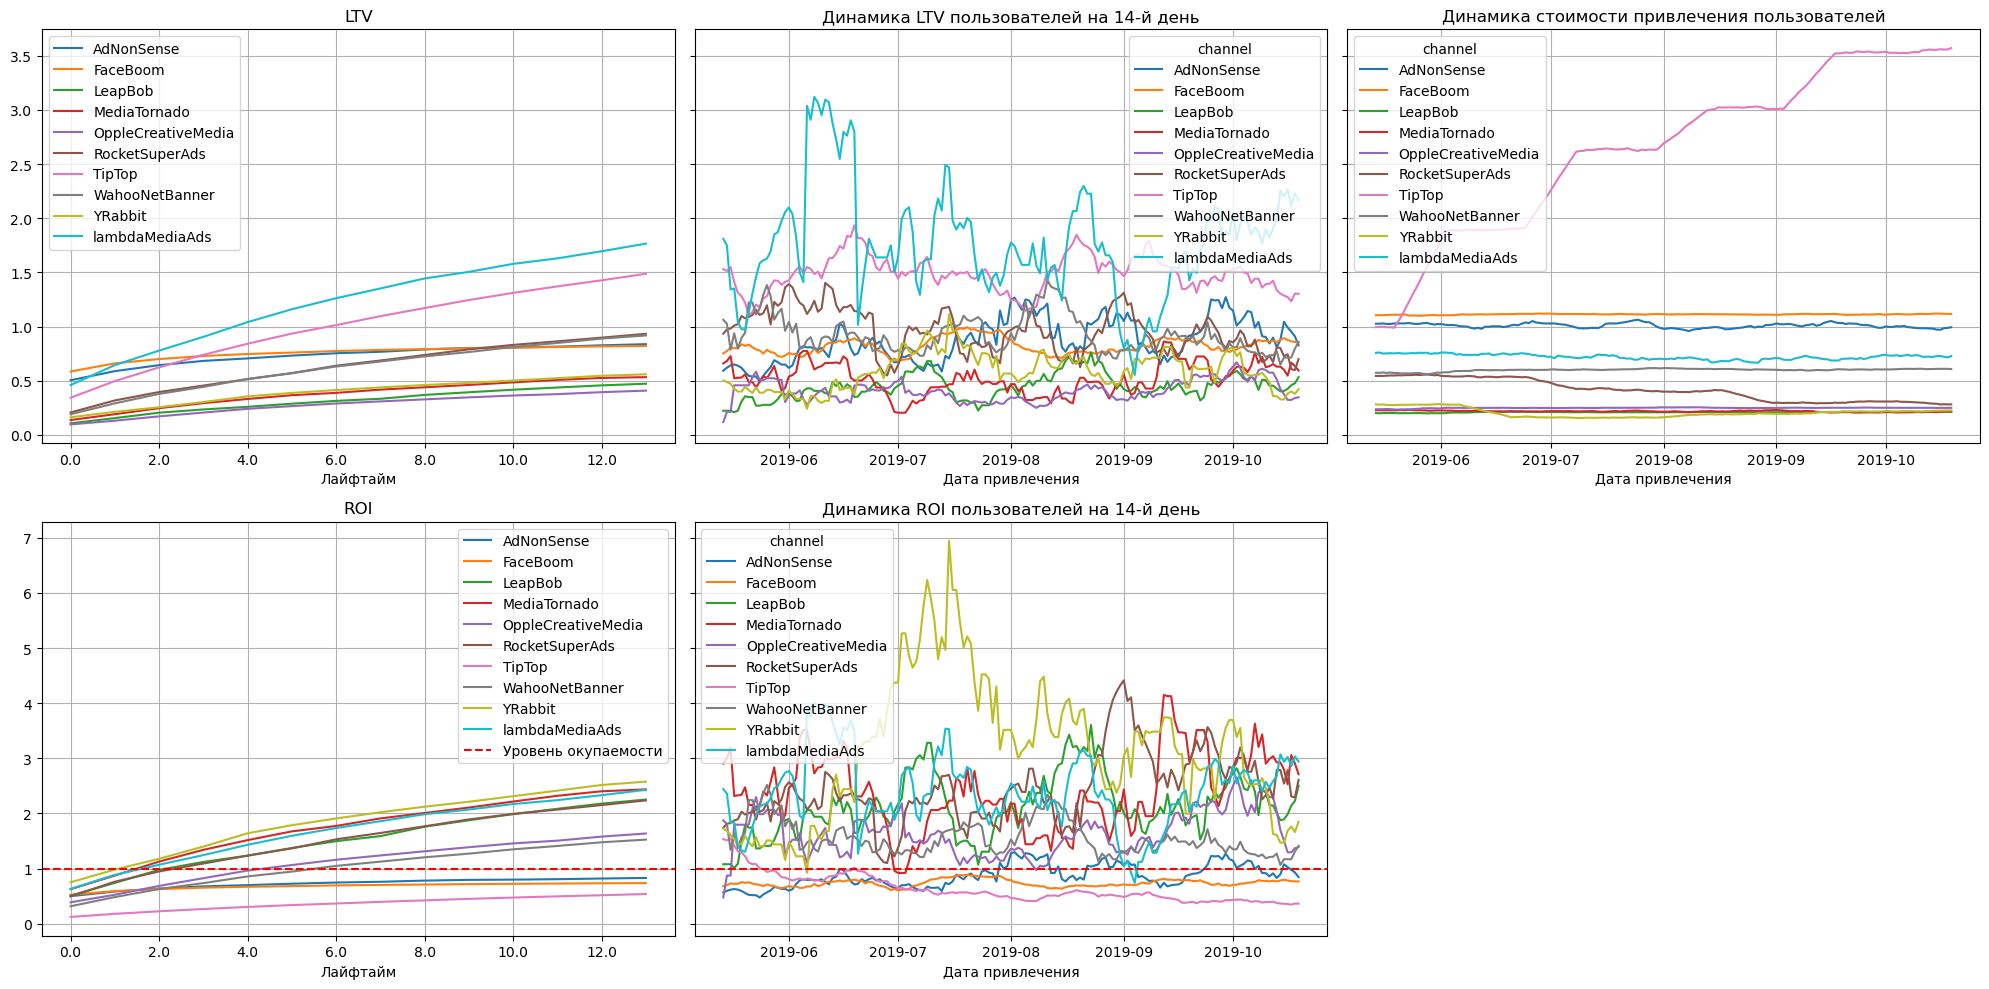

In [101]:
# Смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# Строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [102]:
# Смотрим CAC, ROI на 14 день:
roi_grouped[['cac', 13]].sort_values(by=13, ascending=False)

cac      13.0
channel                               
YRabbit             0.217087  2.578086
MediaTornado        0.219035  2.436519
lambdaMediaAds      0.727237  2.428712
LeapBob             0.210000  2.252399
RocketSuperAds      0.417431  2.237019
OppleCreativeMedia  0.249908  1.637075
WahooNetBanner      0.601856  1.526304
AdNonSense          1.008023  0.831337
FaceBoom            1.113419  0.737790
TipTop              2.757774  0.539532

In [103]:
# Смотрим LTV для всех каналов:
ltv_grouped[13].sort_values(ascending=False)

channel
lambdaMediaAds        1.766250
TipTop                1.487908
RocketSuperAds        0.933801
WahooNetBanner        0.918615
AdNonSense            0.838006
FaceBoom              0.821469
YRabbit               0.559668
MediaTornado          0.533684
LeapBob               0.473004
OppleCreativeMedia    0.409118
Name: 13.0, dtype: float64

Выводы:
1. Окупаемость пользователей.
    - эффективные каналы: YRabbit, MediaTornado, lambdaMediaAds, LeapBob и RocketSuperAds, так как они показывают ROI значительно выше уровня окупаемости. Особенно выделяется YRabbit, где ROI достиг 7 в середине июля, что является исключительным результатом.
    - перспективные каналы: OppleCreativeMedia и WahooNetBanner имеют потенциал для улучшения окупаемости.
    - неэффективные каналы: AdNonSense, FaceBoom и TipTop имеют низкий ROI и не обеспечивают окупаемости пользователей в течение двух недель.


2. CAC пользователей. 
    - CAC у канала TipTop резко увеличился в 2 раза (с 1 до 2) в начале июня, что привело к продолжению роста до уровня 3.5.
    - CAC у остальных каналов привлечения с течением времени не меняется и остается стабильным. 
    - классификация каналов:
        - дорогие каналы: TipTop (2.75),  FaceBoom (1.11), AdNonSense (1.01);
        - каналы со средней стоимостью привлечения: lambdaMediaAds (0.73), WahooNetBanner (0.60), RocketSuperAds (0.42);
        - недорогие каналы: OppleCreativeMedia (0.25), MediaTornado (0.22), YRabbit (0.22), LeapBob (0.21).    
  
  
3. LTV пользователей:
    - LTV у канала lambdaMediaAds увеличился в 1.5 раза (с 2 до 3) в начале июня и снизился до 0.6 в начале сентября. Несмотря на большую амплитуду изменения значений LTV канал lambdaMediaAds приводит качественных пользователей.
    - классификация каналов:
        - lambdaMediaAds, TipTop: пользователи, привлеченные  с этих каналов имеют наибольшую ценность.
        - RocketSuperAds, WahooNetBanner, AdNonSense, FaceBoom: имеют среднюю LTV. 
        - YRabbit, MediaTornado, LeapBob, OppleCreativeMedia: показывают наименьшую LTV.

In [105]:
# Смотрим окупаемость с разбивкой по устройствам и канлам

dimensions = ['device', 'channel']

ltv_raw, ltv_grouped_dev_ch, ltv_history_dev_ch, roi_grouped_dev_ch, roi_history_dev_ch = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

In [106]:
# Считаем CAC и ROI на 14 день по устройствам и каналам

avg_cac = 0.70

# Функция для покраски значений в красный, если ROI меньше 1 для столбца 13
def color_red_ltv(val):
    color = 'red' if val < 1 else 'black' 
    return f'color: {color}'

# Функция для покраски значений в красный, если CAC больше 0.70 для столбца 'cac'
def color_red_cac(val):
    color = 'red' if val > avg_cac else 'black' 
    return f'color: {color}'

# Переименуем столбец 13 на 'roi_14_day'
roi_sorted = roi_grouped_dev_ch[['cohort_size', 'cac', 13]].rename(columns={13: 'roi_14_day'})

# Сортировка для наглядности
roi_sorted = roi_sorted.sort_values(by=['device', 'roi_14_day'], ascending=False)

# Применение стиля
roi_styled = roi_sorted.style.map(color_red_cac, subset=['cac']).map(color_red_ltv, subset=['roi_14_day'])

display(roi_styled)

Выводы:
- YRabbit и LeapBob: эффективные каналы на всех устройствах, с низким CAC и высоким ROI.
- TipTop и FaceBoom: убыточные каналы: высокий CAC и низкий ROI на всех устройствах.

### Выводы

1. Структура данных и их подготовка:
- visits (309901 строк × 6 столбцов): данные содержат информацию о визитах пользователей: регион, устройство, канал привлечения и временные отметки начала и окончания сессий.
- orders (40212 строк × 3 столбца): данные о заказах пользователей: идентификатор пользователя, время заказа и сумму дохода.
- costs (1800 строк × 3 столбца): данные о затратах на рекламу по каналам и дням.

Качество данных: Пропуски и дубликаты отсутствуют. Данные были подготовлены: столбцы переименованы, временные метки преобразованы для дальнейшего анализа.


2. Анализ профилей пользователей:
- 2.1. Распределение по странам:
    - Общее количество пользователей: 150,008.
    - США (66.66%) лидирует по числу пользователей, далее идут: Великобритания (11.72%), Франция (11.63%), Германия (9.99%).
    - Доля платящих пользователей: 5.92%. Наибольшая доля платящих в США — 6.9%, в Германии — 4.11%, Великобритании — 3.98%, Франции — 3.8%.
    
- 2.2. Распределение по устройствам:
    - iPhone: 36.35% пользователей, Android: 23.35%, Mac и PC: по 20.3%.
    - Наибольшая доля платящих у пользователей Mac (6.36%) и iPhone (6.21%). У Android — 5.85%, у PC — 5.05%.

- 2.3. Распределение по рекламным каналам:
    - Organic привлекает 37.62% пользователей, но с низкой конверсией — 2.06%.
    - FaceBoom: привлекает 19.43% пользователей, с наибольшей долей платящих — 12.20%.
    
    
3. Маркетинговые расходы:
- Общая сумма расходов: 105,497.30.
- Основные затраты на TipTop и FaceBoom (82.66% от всех расходов).
- TipTop: затраты выросли в 9.4 раза (с 347.00 до 3265.50).
- FaceBoom: расходы увеличились в 2.9 раза (с 535.70 до 1552.10).
- Рост затрат связан с увеличением CAC с июня. У других каналов расходы остаются стабильными.


4. Анализ окупаемости рекламы (ROI):
- 4.1. Окупаемость рекламы:
    - LTV: увеличивается со временем.
    - CAC: с конца мая вырос в 1.7 раза (с 0.78 до 1.33).
    - ROI на 14 день: снижается, реклама перестала окупаться в конце мая из-за увеличения CAC.
    
- 4.2. Анализ рекламы по устройствам:
    - LTV: растет у всех устройств, у Mac (0.93), iPhone/Android (0.91), у PC (0.83).
    - CAC: рост у iPhone и Mac (с 0.75 до 1.5), у Android: с 0.7 до 1.2, у PC: с 0.68 до 0.9.
    - ROI: Пользователи PC окупаются на 11-й день. Android, iPhone, Mac не окупаются в течение 2 недель.

- 4.3. Анализ рекламы по странам:
    - LTV: самый высокий в США (1.00), ниже в Великобритании (0.74), Германии (0.71) и Франции (0.67).
    - CAC: В США вырос в 2.1 раза (с 0.8 до 1.7). В Великобритании, Германии и Франции упал в 1.5 раза (с 0.6 до 0.4 в начале июня).
    - ROI: Пользователи Великобритании окупаются на 4-й день, Германии и Франции — на 5-й день. В США ROI не окупается за 2 недели.
    
- 4.4. Анализ рекламы по каналам:
    - Эффективные каналы: YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds (высокий ROI, особенно YRabbit с ROI = 7).
    - Неэффективные каналы: AdNonSense, FaceBoom, TipTop не окупаются за 2 недели.
    - CAC: значительный рост у TipTop (с 1 до 3.5), другие каналы остаются стабильными. Дорогие каналы — TipTop, FaceBoom, AdNonSense; недорогие — YRabbit, MediaTornado, LeapBob.
    - LTV: значительный рост у lambdaMediaAds в июне, но к сентябрю он снизился. TipTop и lambdaMediaAds приводят наиболее ценных пользователей.
    
- 4.5. Конверсия:
    - По странам: В США конверсия выросла с 7.18% до 9.60%. В Великобритании, Франции и Германии — с 3.33% до 4.90%.
    - По устройствам: Mac и iPhone показывают наибольшую конверсию — 8.7% и 8.4%, соответственно.
    - По рекламным каналам: FaceBoom, AdNonSense — наиболее эффективные каналы по конверсии, lambdaMediaAds и RocketSuperAds имеют хорошие тенденции роста.
    
- 4.6. Удержание:
    - По странам: В Великобритании, Германии и Франции удержание начинается с 48% и падает до 14-17% на 14-й день. В США удержание ниже — 35% на 1-й день и 9% на 14-й день.
    - По устройствам: У PC лучшее удержание в начале (42%), но к 14-му дню почти совпадает с другими устройствами (12%).
    - По каналам: RocketSuperAds, WahooNetBanner, LeapBob и lambdaMediaAds показывают наилучшее удержание. AdNonSense и FaceBoom — худшие результаты.

    
5. Причины неэффективности привлечения пользователей:
- Причины неэффективности рекламы в США:
    - Большая доля неокупаемой рекламы:
        - 66.66% пользователей из США, но реклама в этом регионе не окупается.
        - 80% рекламных затрат в США приходится на 2 убыточных канала: TipTop и FaceBoom.
    - Высокий CAC и низкое удержание у основных каналов:
        - TipTop имеет CAC (2.80), что в 4 раза выше среднего (0.7), что существенно снижает ROI.
        - FaceBoom имеет CAC (1.11), превышающий средний показатель в 1.6 раза.
        - AdNonSense также имеет высокий CAC (1.01), в 1.4 раза больше среднего.
        - Низкое удержание у каналов FaceBoom и AdNonSense. Начальное удержание в 2.2 раза ниже, чем у других каналов, и продолжает снижаться до крайне низкого уровня на 14-й день, что делает их неэффективными для долгосрочной монетизации.

- Проблемы устройств Android, iPhone и Mac:
    - Высокий CAC:
        - Устройства iPhone и Mac демонстрируют CAC на уровне 1.5, что в 2 раза выше среднего (0.7).
        - У Android CAC (1.2) в 1.7 раза превышает средний показатель. Это ведет к увеличению затрат на привлечение пользователей с этих устройств, что снижает прибыльность маркетинговых кампаний.
     - Низкое удержание: несмотря на более высокие начальные конверсии, удержание пользователей у Android, iPhone и Mac ниже, чем у PC, особенно к 14-му дню.
     
6. Рекомендации для отдела маркетинга:
- Сократить или полностью исключить затраты на TipTop, AdNonSense, и FaceBoom из маркетинговой стратегии, сосредоточив бюджет на lambdaMediaAds и RocketSuperAds, которые показывают наилучшие результаты по окупаемости, конверсии и удержанию:
    - Эффективные рекламные каналы: lambdaMediaAds и RocketSuperAds показывают высокую окупаемость (ROI > 2.0) на всех устройствах (iPhone, PC, Mac, Android). Эти каналы также показывают относительно низкий CAC (от 0.21 до 0.73), и высокие показатели конверсии. lambdaMediaAds хорошо работает в Великобритании, Франции, Англии, обеспечивая ROI выше 2.8. RocketSuperAds хорош в США.

    - Неэффективные рекламные каналы: AdNonSense, TipTop, и FaceBoom имеют низкий ROI (меньше 1.0) и высокий CAC, особенно TipTop (CAC до 2.75), что приводит к отрицательной окупаемости инвестиций на всех устройствах. 

- Organic привлекает большое количество пользователей с низкой конверсией. Следует изучить возможности увеличения процента платящих пользователей.